In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime

In [7]:
data_save_path = r"C:\Users\behra\Downloads\stock market\Stock Predictions Model.keras"

In [9]:
# Setting date range for the past 20 years
end = datetime.now()
start = datetime(end.year - 20, end.month, end.day)

In [11]:
google_data = yf.download("GOOG", start, end)
microsoft_data = yf.download("MSFT", start, end)
apple_data = yf.download("AAPL", start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
google_data.to_csv(data_save_path + "google_data.csv")
microsoft_data.to_csv(data_save_path + "microsoft_data.csv")
apple_data.to_csv(data_save_path + "apple_data.csv")
print(f"Data saved to {data_save_path}")

Data saved to C:\Users\behra\Downloads\stock market\Stock Predictions Model.keras


In [15]:
# Inspecting Google stock data
print("Alphabet Inc. (GOOGLE) STOCK PRICE\n")
print(google_data.head())          # Display the first 5 rows
print(google_data.info())          # Summary of the dataset
print(google_data.describe())      # Statistical summary
print(google_data.isna().sum())    # Count missing values

Alphabet Inc. (GOOGLE) STOCK PRICE

Price                     Adj Close     Close      High       Low      Open  \
Ticker                         GOOG      GOOG      GOOG      GOOG      GOOG   
Date                                                                          
2004-11-16 00:00:00+00:00  4.286864  4.297392  4.469995  4.254802  4.420929   
2004-11-17 00:00:00+00:00  4.285870  4.296396  4.420929  4.209223  4.209721   
2004-11-18 00:00:00+00:00  4.162637  4.172859  4.344217  4.127778  4.241352   
2004-11-19 00:00:00+00:00  4.208849  4.219185  4.233631  4.147454  4.211713   
2004-11-22 00:00:00+00:00  4.102013  4.112087  4.221676  4.017691  4.096396   

Price                         Volume  
Ticker                          GOOG  
Date                                  
2004-11-16 00:00:00+00:00  839832142  
2004-11-17 00:00:00+00:00  728034662  
2004-11-18 00:00:00+00:00  667677273  
2004-11-19 00:00:00+00:00  352086780  
2004-11-22 00:00:00+00:00  496582362  
<class 'pandas.core

<Figure size 1500x500 with 0 Axes>

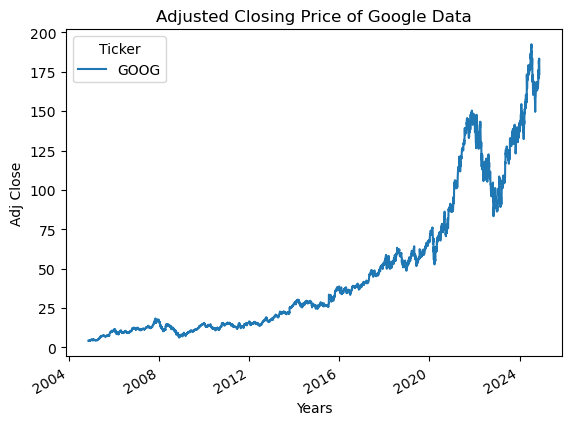

In [17]:
# Plot Adjusted Close Price:
plt.figure(figsize=(15, 5))
google_data['Adj Close'].plot()
plt.xlabel("Years")
plt.ylabel("Adj Close")
plt.title("Adjusted Closing Price of Google Data")
plt.show()

In [19]:
# Create a Graph Plotting Function:
def plot_graph(figsize, values, column_name):
    plt.figure(figsize=figsize)
    values.plot()
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google Data")
    plt.show()

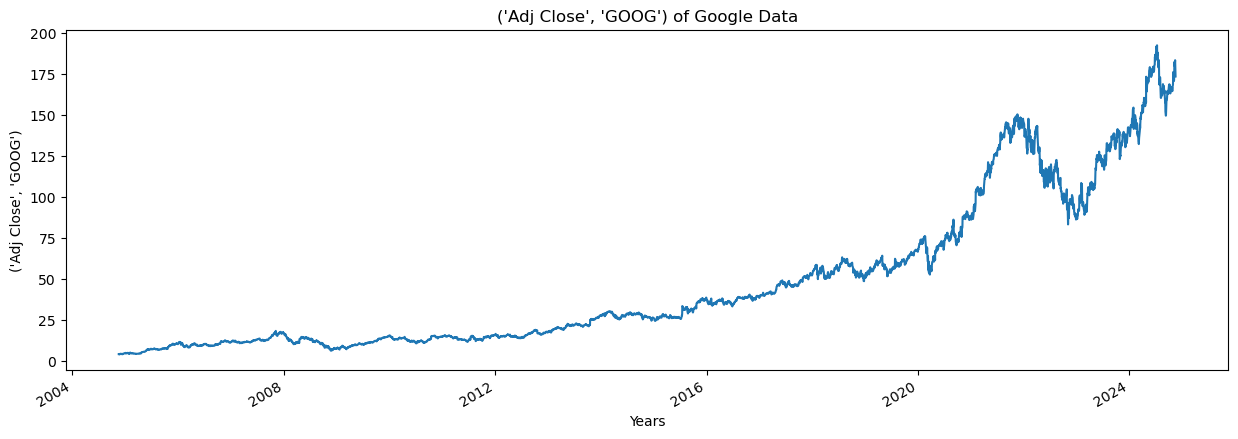

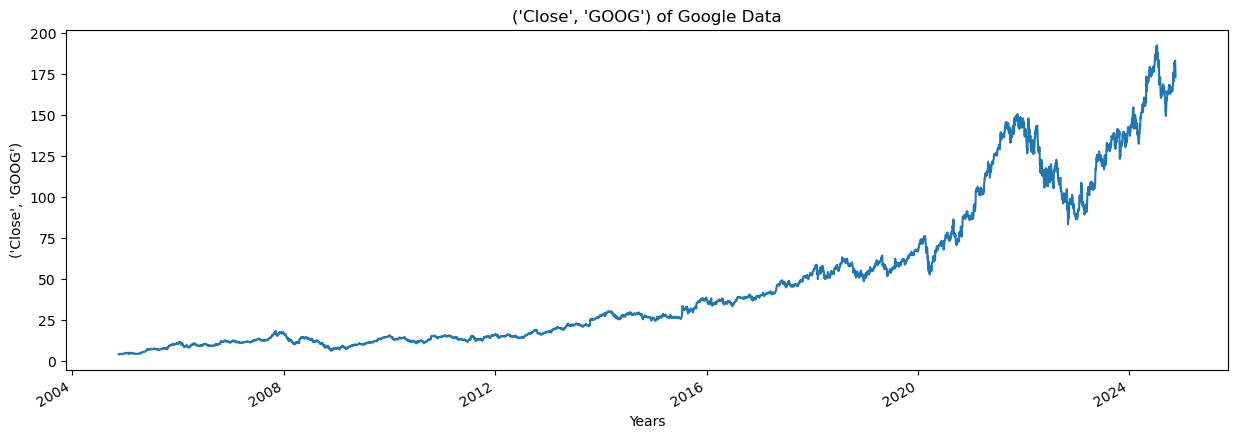

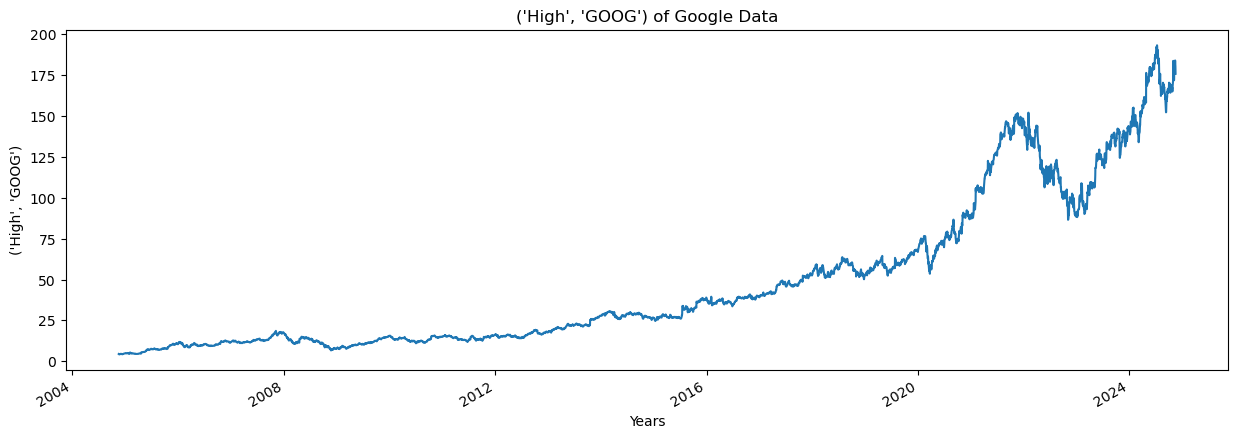

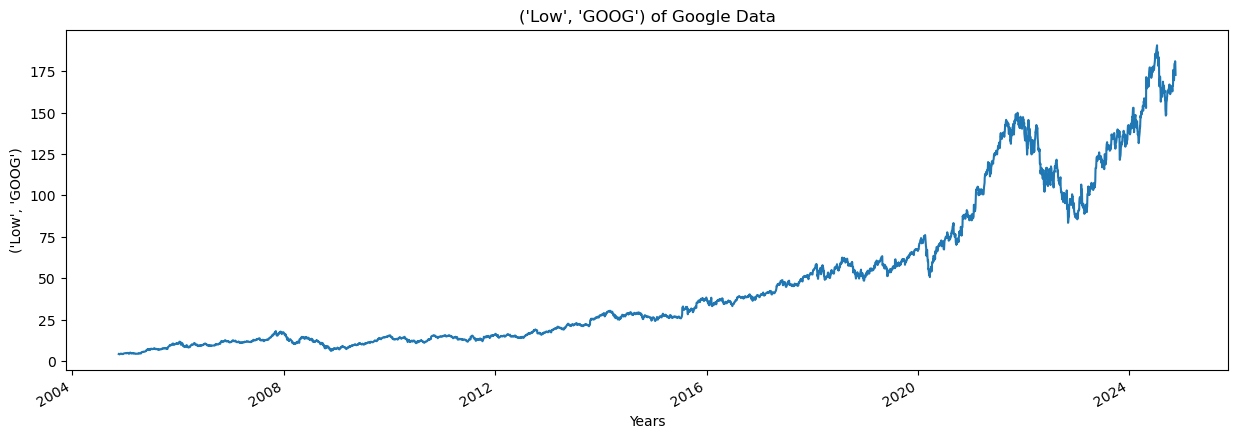

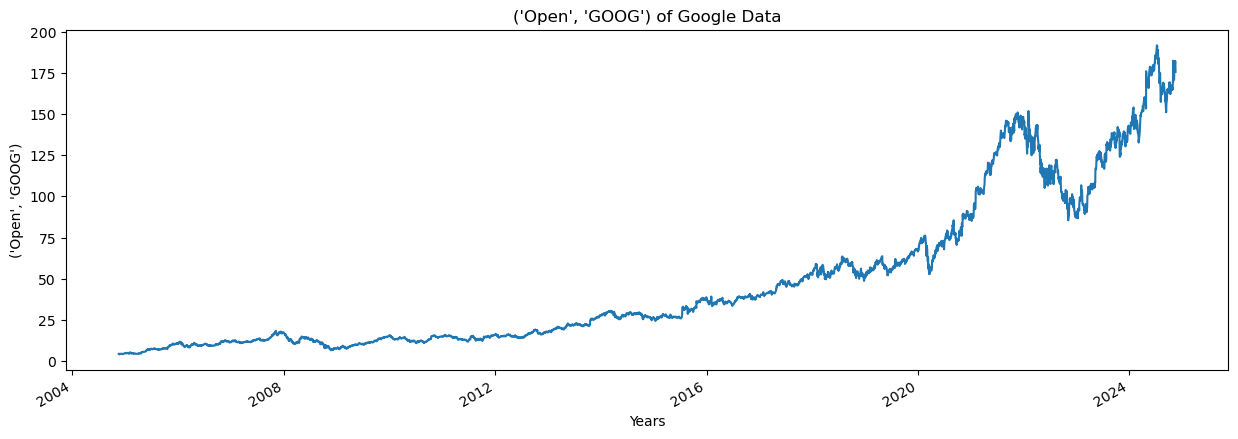

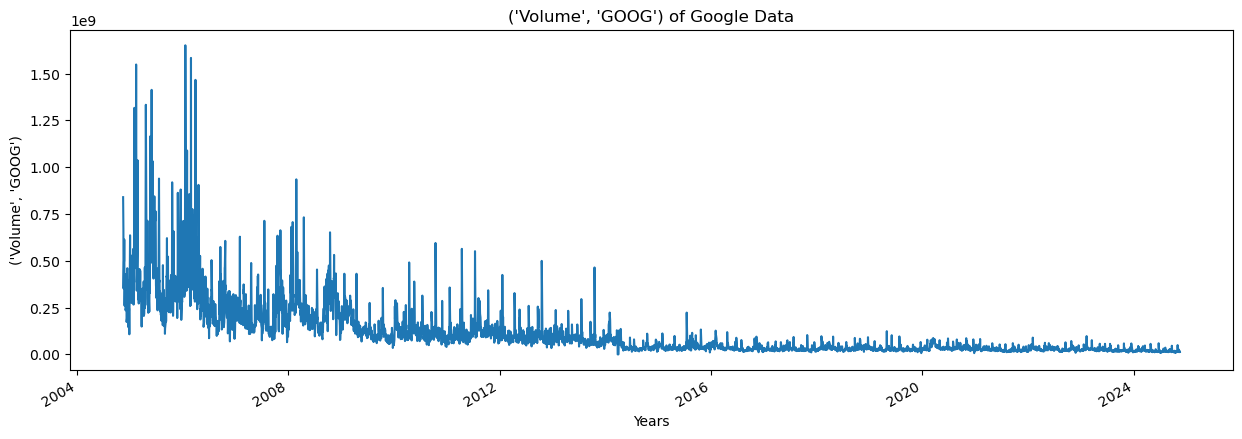

In [21]:
for column in google_data.columns:
    plot_graph((15, 5), google_data[column], column)

In [23]:
# Count Number of Working Days Per Year:
for year in range(2004, 2025):
    print(year, list(google_data.index.year).count(year))

2004 32
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 222


Date
2005-11-04 00:00:00+00:00        NaN
2005-11-07 00:00:00+00:00        NaN
2005-11-08 00:00:00+00:00        NaN
2005-11-09 00:00:00+00:00        NaN
2005-11-10 00:00:00+00:00    6.12562
Name: MA_for_250_days, dtype: float64


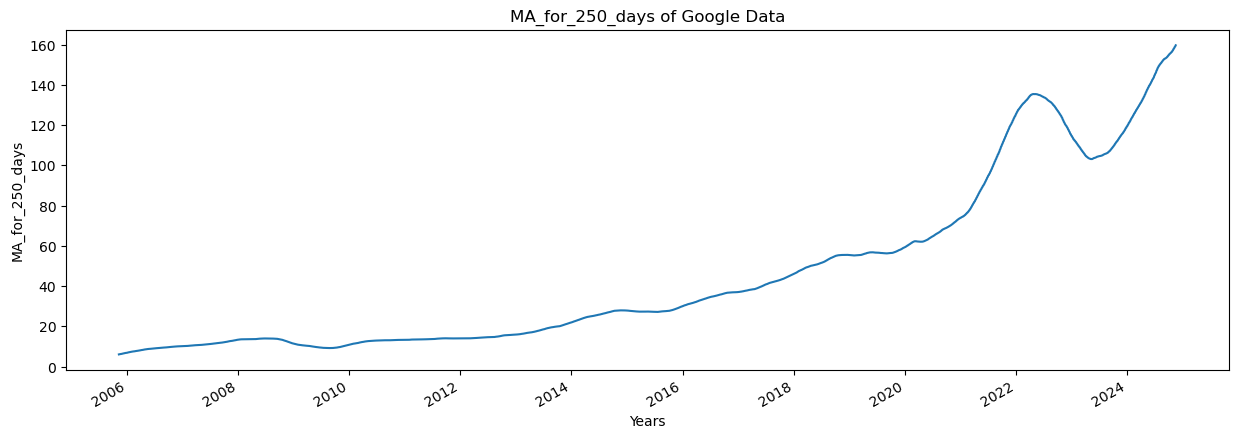

<Figure size 1500x500 with 0 Axes>

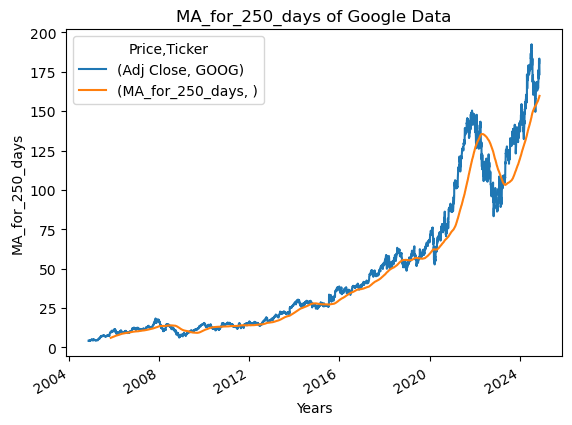

In [25]:
# 250-Day Moving Average:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()
print(google_data['MA_for_250_days'][0:250].tail())
plot_graph((15, 5), google_data['MA_for_250_days'], 'MA_for_250_days')
plot_graph((15, 5), google_data[['Adj Close', 'MA_for_250_days']], 'MA_for_250_days')

<Figure size 1500x500 with 0 Axes>

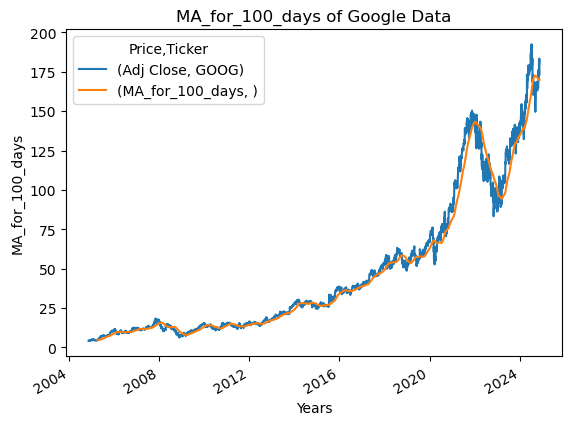

In [27]:
# 100-Day Moving Average:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15, 5), google_data[['Adj Close', 'MA_for_100_days']], 'MA_for_100_days')


<Figure size 1500x500 with 0 Axes>

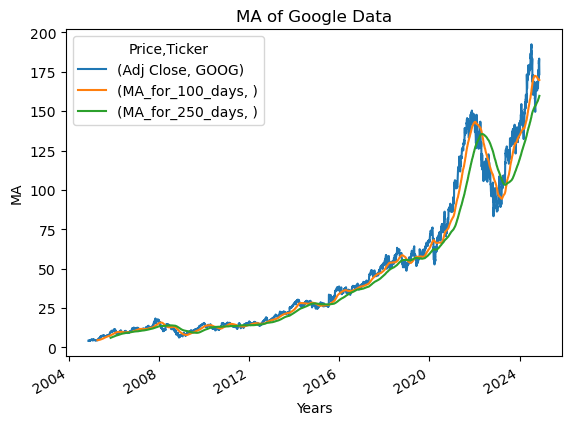

In [29]:
# Combined Plot of Moving Averages:
plot_graph((15, 5), google_data[['Adj Close', 'MA_for_100_days', 'MA_for_250_days']], 'MA')

Price                     Adj Close percentage_change_closeprice
Ticker                         GOOG                             
Date                                                            
2004-11-16 00:00:00+00:00  4.286864                          NaN
2004-11-17 00:00:00+00:00  4.285870                    -0.000232
2004-11-18 00:00:00+00:00  4.162637                    -0.028753
2004-11-19 00:00:00+00:00  4.208849                     0.011102
2004-11-22 00:00:00+00:00  4.102013                    -0.025384


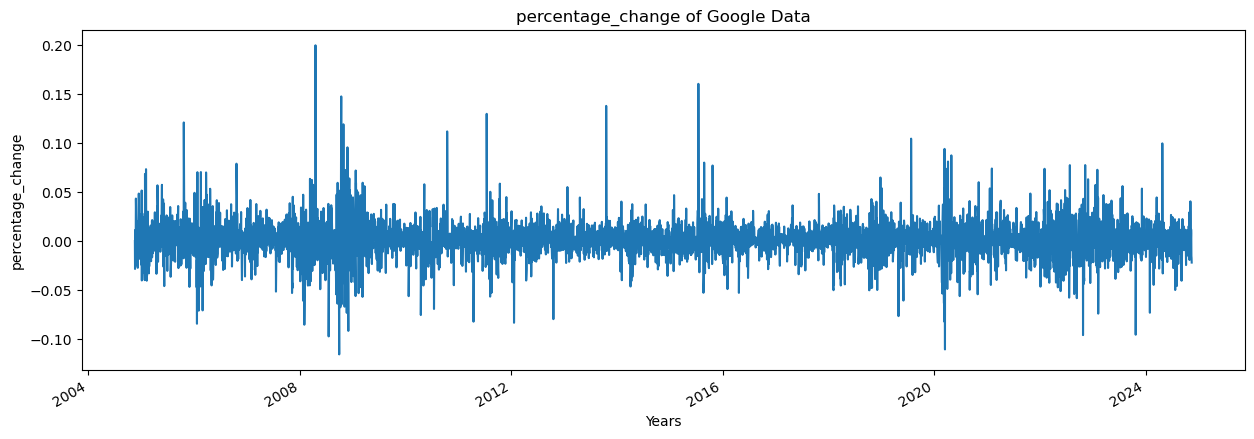

In [31]:
google_data['percentage_change_closeprice'] = google_data['Adj Close'].pct_change()
print(google_data[['Adj Close', 'percentage_change_closeprice']].head())
plot_graph((15, 5), google_data['percentage_change_closeprice'], 'percentage_change')

In [33]:
Adj_close_price = google_data[['Adj Close']]
print(max(Adj_close_price.values), min(Adj_close_price.values))

[192.40672302] [4.10201311]


Microsoft Corporation (MSFT)


In [35]:
# Inspecting Microsoft stock data
print("Microsoft Corporation STOCK PRICE\n")
print(microsoft_data.head())          # Display the first 5 rows
print(microsoft_data.info())          # Summary of the dataset
print(microsoft_data.describe())      # Statistical summary

Microsoft Corporation STOCK PRICE

Price                      Adj Close      Close   High        Low       Open  \
Ticker                          MSFT       MSFT   MSFT       MSFT       MSFT   
Date                                                                           
2004-11-16 00:00:00+00:00  18.857666  27.120001  27.34  27.049999  27.330000   
2004-11-17 00:00:00+00:00  18.892433  27.170000  27.35  27.059999  27.250000   
2004-11-18 00:00:00+00:00  18.822905  27.070000  27.17  27.000000  27.129999   
2004-11-19 00:00:00+00:00  18.676870  26.860001  27.07  26.840000  27.030001   
2004-11-22 00:00:00+00:00  18.530851  26.650000  26.82  26.100000  26.750000   

Price                        Volume  
Ticker                         MSFT  
Date                                 
2004-11-16 00:00:00+00:00  64522600  
2004-11-17 00:00:00+00:00  58830700  
2004-11-18 00:00:00+00:00  63249900  
2004-11-19 00:00:00+00:00  85808600  
2004-11-22 00:00:00+00:00  92410800  
<class 'pandas.core.

<Figure size 1500x500 with 0 Axes>

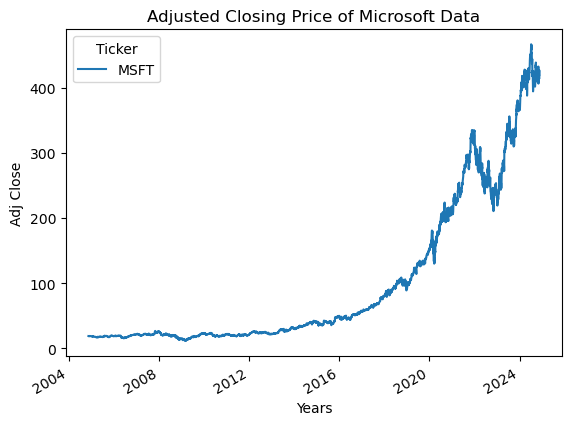

In [37]:
# Plotting Adjusted Close Price over the years
plt.figure(figsize=(15, 5))
microsoft_data['Adj Close'].plot()
plt.xlabel("Years")
plt.ylabel("Adj Close")
plt.title("Adjusted Closing Price of Microsoft Data")
plt.show()

In [39]:
# Function for plotting a column
def plot_graph(figsize, values, column_name):
    plt.figure(figsize=figsize)
    values.plot()
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Microsoft Data")
    plt.show()

In [41]:
# Display column names
print(microsoft_data.columns)

MultiIndex([('Adj Close', 'MSFT'),
            (    'Close', 'MSFT'),
            (     'High', 'MSFT'),
            (      'Low', 'MSFT'),
            (     'Open', 'MSFT'),
            (   'Volume', 'MSFT')],
           names=['Price', 'Ticker'])


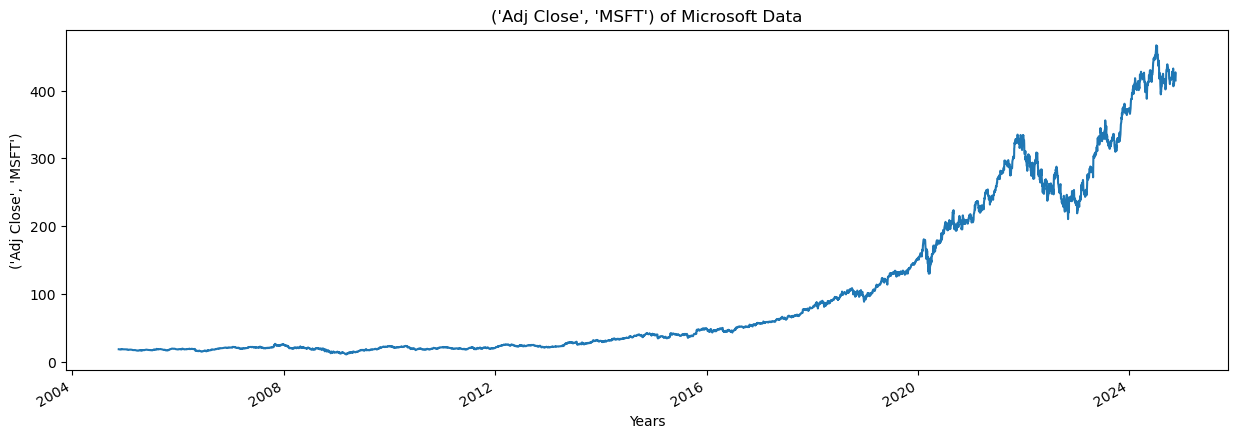

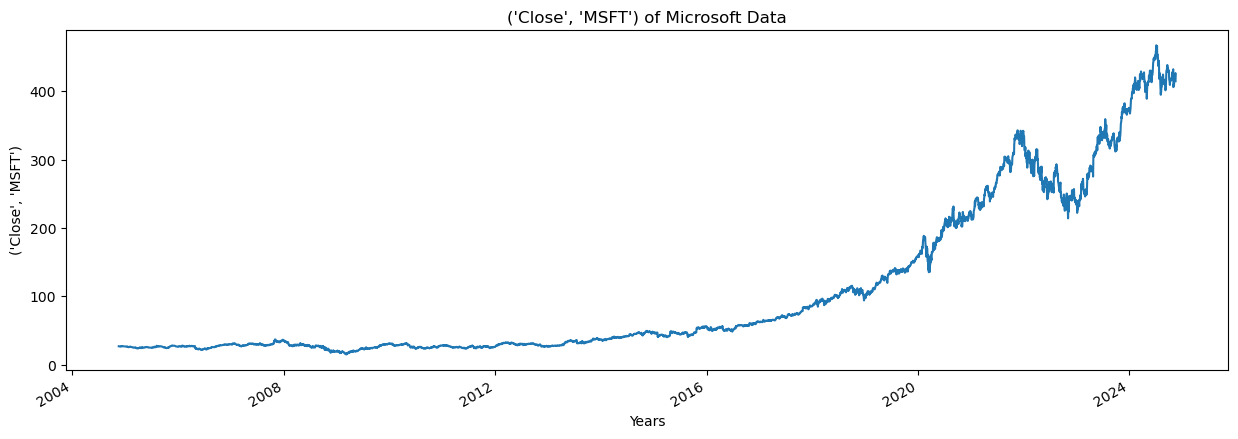

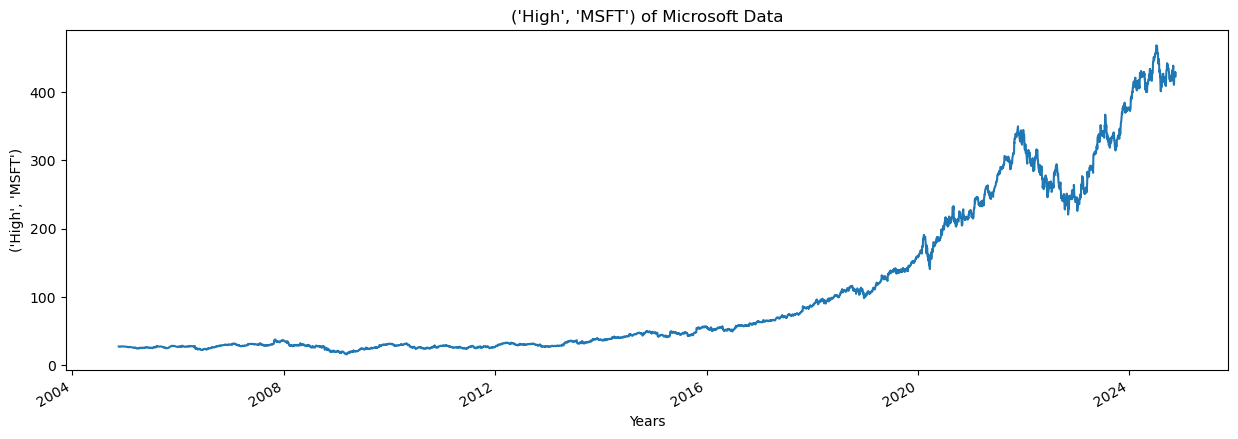

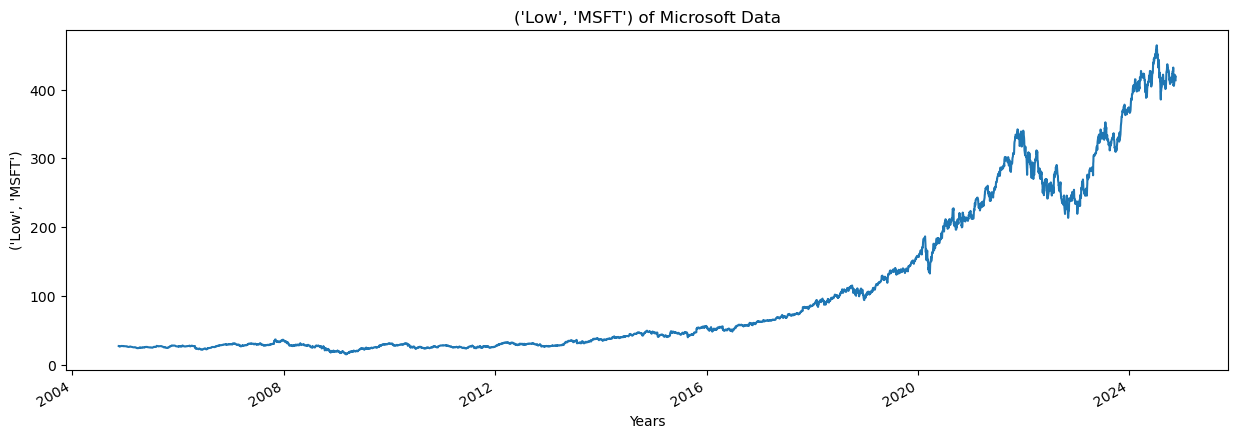

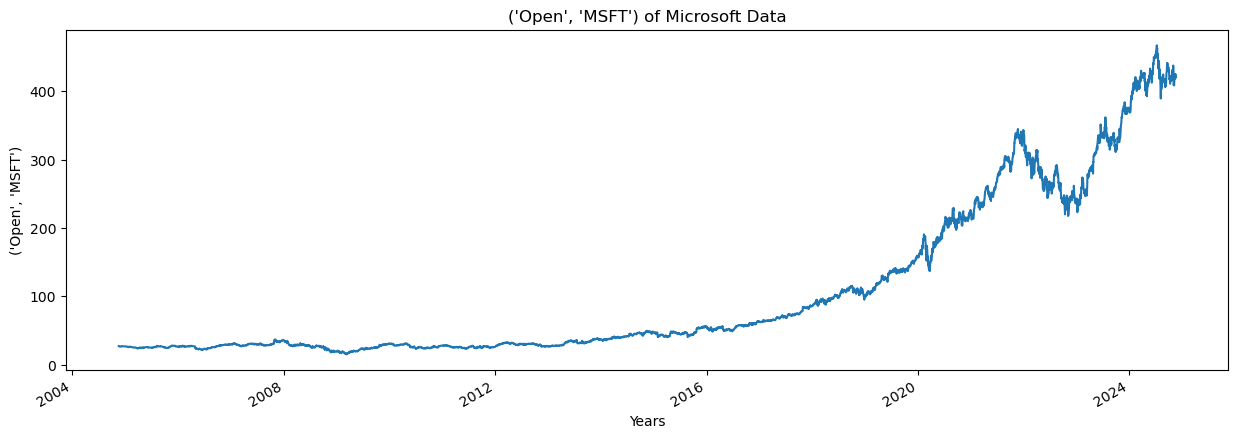

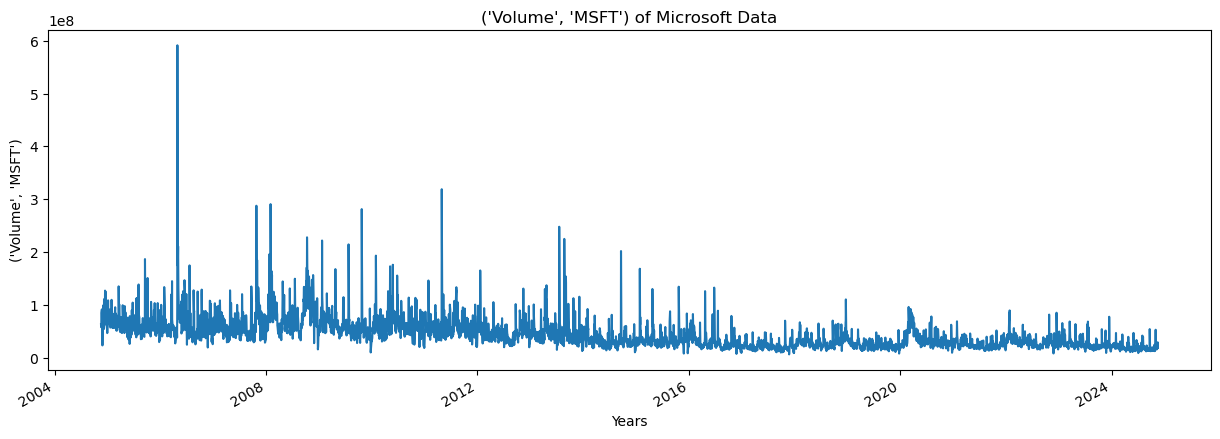

In [43]:
# Plot each column
for column in microsoft_data.columns:
    plot_graph((15, 5), microsoft_data[column], column)

In [45]:
# Number of working days in each year
for year in range(2004, 2025):
    print(year, list(microsoft_data.index.year).count(year))

2004 32
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 222


Date
2005-11-04 00:00:00+00:00   NaN
2005-11-07 00:00:00+00:00   NaN
2005-11-08 00:00:00+00:00   NaN
2005-11-09 00:00:00+00:00   NaN
2005-11-10 00:00:00+00:00   NaN
Name: MA_for_250_days, dtype: float64


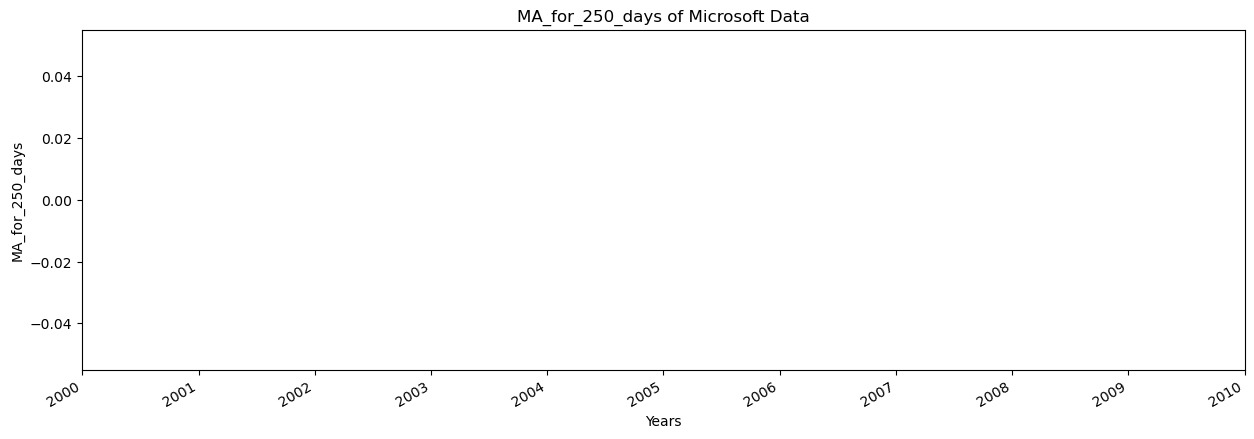

<Figure size 1500x500 with 0 Axes>

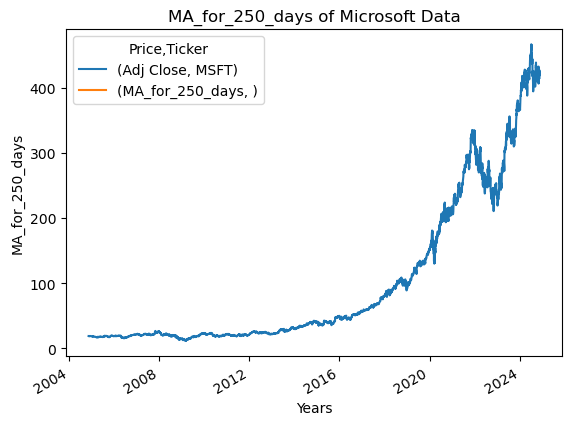

In [49]:
# 250-Day Moving Average:
microsoft_data['MA_for_250_days'] = microsoft_data['Adj Close'].rolling(250).mean()
print(microsoft_data['MA_for_250_days'][0:250].tail())

plot_graph((15, 5), microsoft_data['MA_for_250_days'], 'MA_for_250_days')
plot_graph((15, 5), microsoft_data[['Adj Close', 'MA_for_250_days']], 'MA_for_250_days')

<Figure size 1500x500 with 0 Axes>

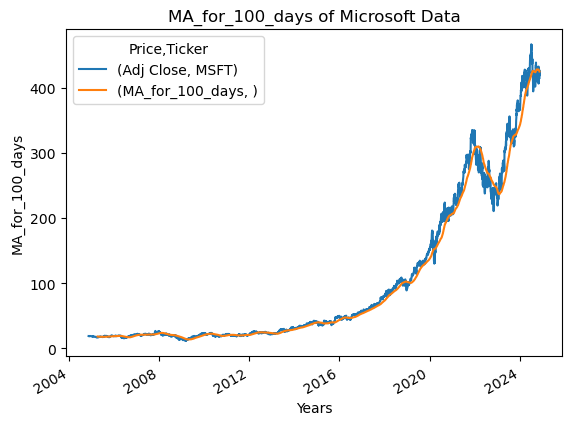

In [51]:
# 100-Day Moving Average:
microsoft_data['MA_for_100_days'] = microsoft_data['Adj Close'].rolling(100).mean()
plot_graph((15, 5), microsoft_data[['Adj Close', 'MA_for_100_days']], 'MA_for_100_days')


<Figure size 1500x500 with 0 Axes>

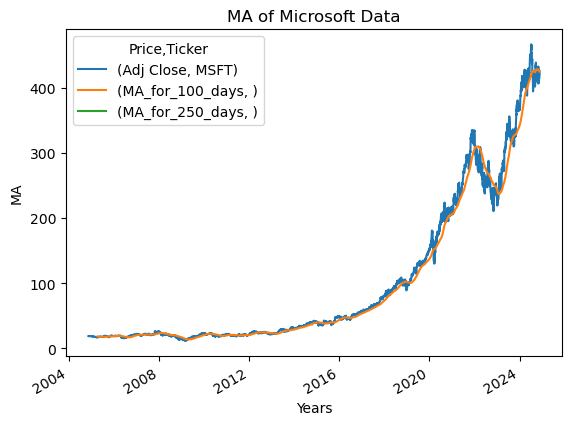

In [53]:
# Combined Plot of Moving Averages:
plot_graph((15, 5), microsoft_data[['Adj Close', 'MA_for_100_days', 'MA_for_250_days']], 'MA')


In [55]:
# Calculate percentage change in closing price
microsoft_data['percentage_change_closeprice'] = microsoft_data['Adj Close'].pct_change()
print(microsoft_data[['Adj Close', 'percentage_change_closeprice']].head())

Price                      Adj Close percentage_change_closeprice
Ticker                          MSFT                             
Date                                                             
2004-11-16 00:00:00+00:00  18.857666                          NaN
2004-11-17 00:00:00+00:00  18.892433                     0.001844
2004-11-18 00:00:00+00:00  18.822905                    -0.003680
2004-11-19 00:00:00+00:00  18.676870                    -0.007758
2004-11-22 00:00:00+00:00  18.530851                    -0.007818


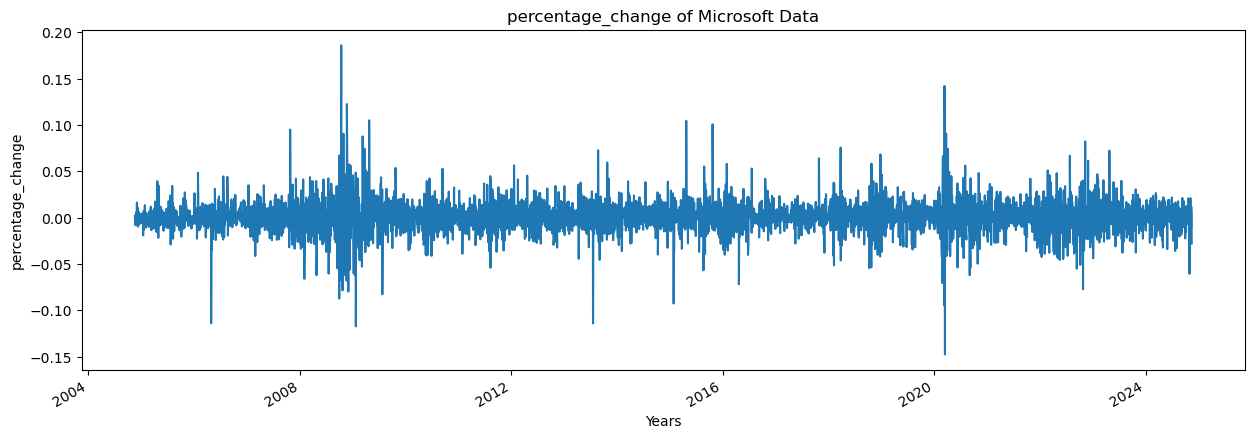

In [57]:
plot_graph((15, 5), microsoft_data['percentage_change_closeprice'], 'percentage_change')


In [59]:
# Inspect adjusted close price range
adj_close_price = microsoft_data[['Adj Close']]
print("Maximum Adjusted Close Price:", max(adj_close_price.values))
print("Minimum Adjusted Close Price:", min(adj_close_price.values))

Maximum Adjusted Close Price: [466.71878052]
Minimum Adjusted Close Price: [11.24318027]


Apple Inc.


In [61]:
# Inspecting Apple stock data
print("APPLE Inc STOCK PRICE\n")
print(apple_data.head())              # Display the first 5 rows
print(apple_data.info())              # Summary of the dataset
print(apple_data.describe())          # Statistical summary
print(apple_data.isna().sum())        # Count of missing values

APPLE Inc STOCK PRICE

Price                     Adj Close     Close      High       Low      Open  \
Ticker                         AAPL      AAPL      AAPL      AAPL      AAPL   
Date                                                                          
2004-11-16 00:00:00+00:00  0.827580  0.981071  0.985714  0.972857  0.985000   
2004-11-17 00:00:00+00:00  0.826977  0.980357  0.990179  0.968214  0.985536   
2004-11-18 00:00:00+00:00  0.834358  0.989107  0.990179  0.969464  0.969643   
2004-11-19 00:00:00+00:00  0.831045  0.985179  1.016250  0.973214  0.990893   
2004-11-22 00:00:00+00:00  0.924136  1.095536  1.142857  1.033929  1.103571   

Price                          Volume  
Ticker                           AAPL  
Date                                   
2004-11-16 00:00:00+00:00   295103200  
2004-11-17 00:00:00+00:00   397751200  
2004-11-18 00:00:00+00:00   459149600  
2004-11-19 00:00:00+00:00   765279200  
2004-11-22 00:00:00+00:00  2568210400  
<class 'pandas.core.fram

<Figure size 1500x500 with 0 Axes>

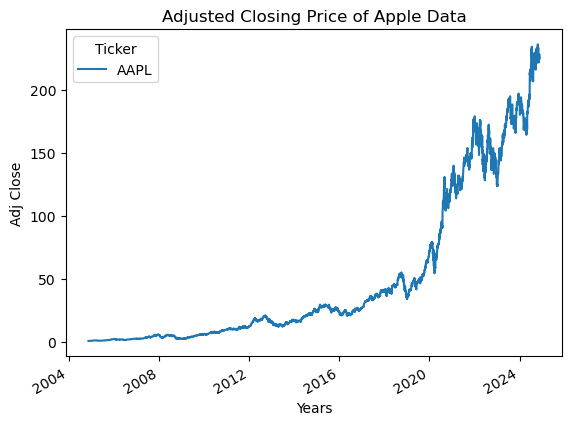

In [63]:
# Plotting Adjusted Close Price over the years
plt.figure(figsize=(15, 5))
apple_data['Adj Close'].plot()
plt.xlabel("Years")
plt.ylabel("Adj Close")
plt.title("Adjusted Closing Price of Apple Data")
plt.show()

In [65]:
# Function for plotting a column
def plot_graph(figsize, values, column_name):
    plt.figure(figsize=figsize)
    values.plot()
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Apple Data")
    plt.show()

In [67]:
# Display column names
print(apple_data.columns)

MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])


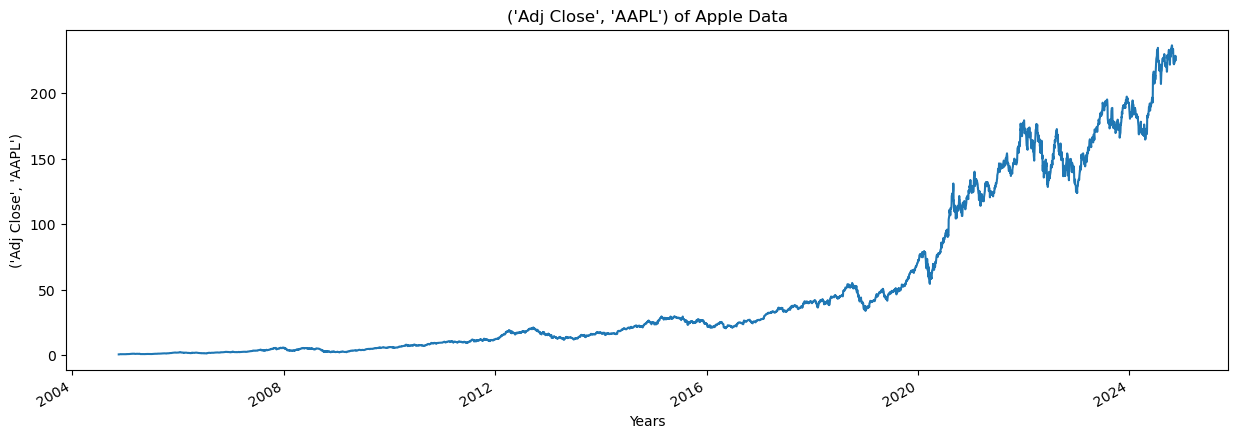

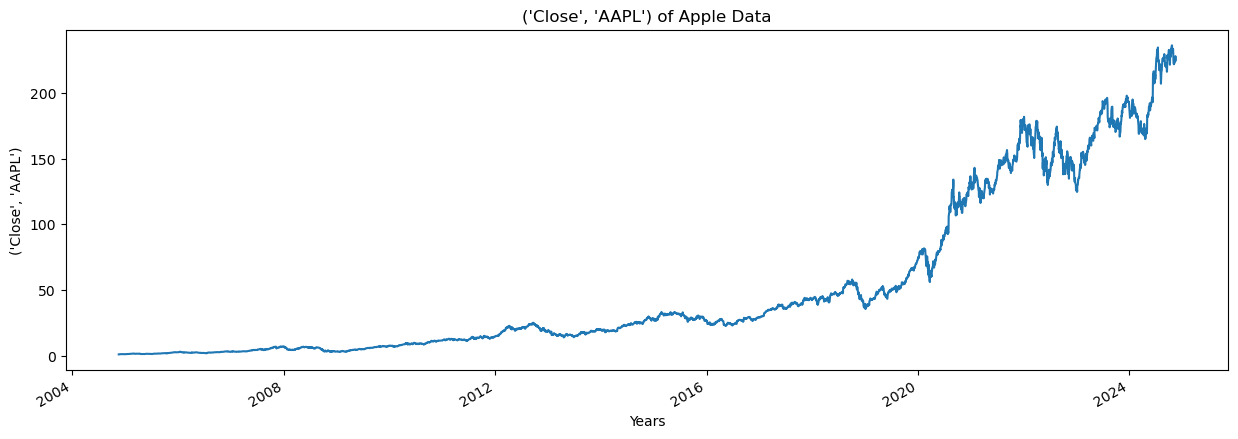

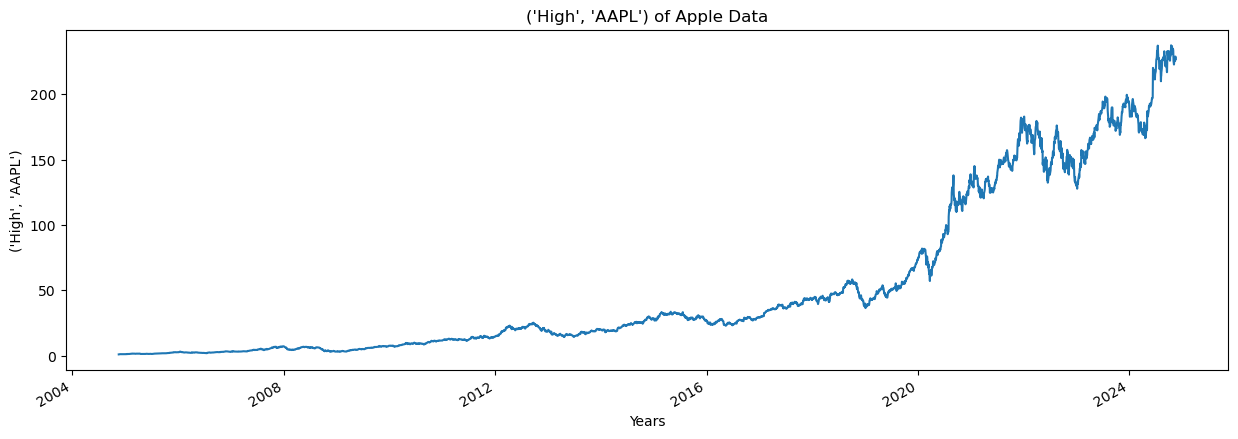

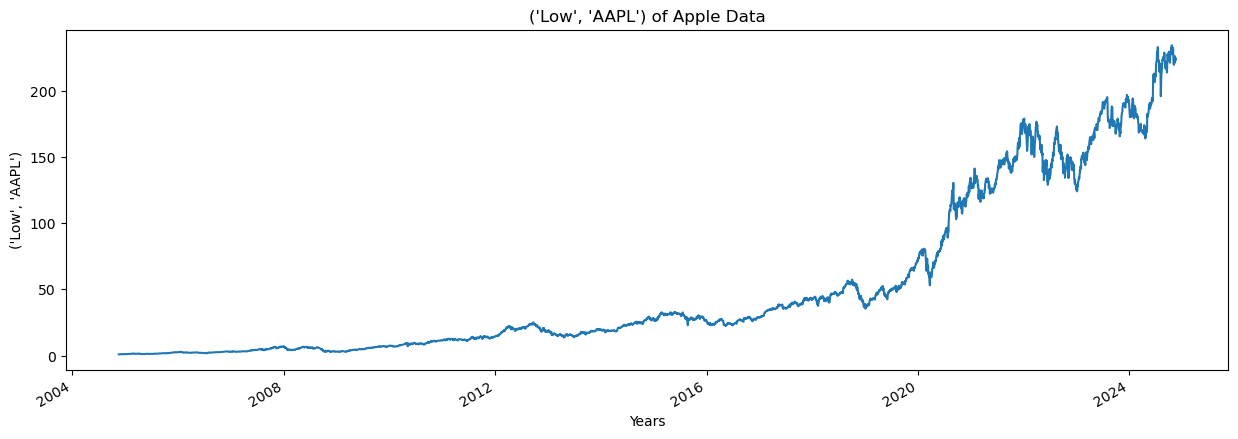

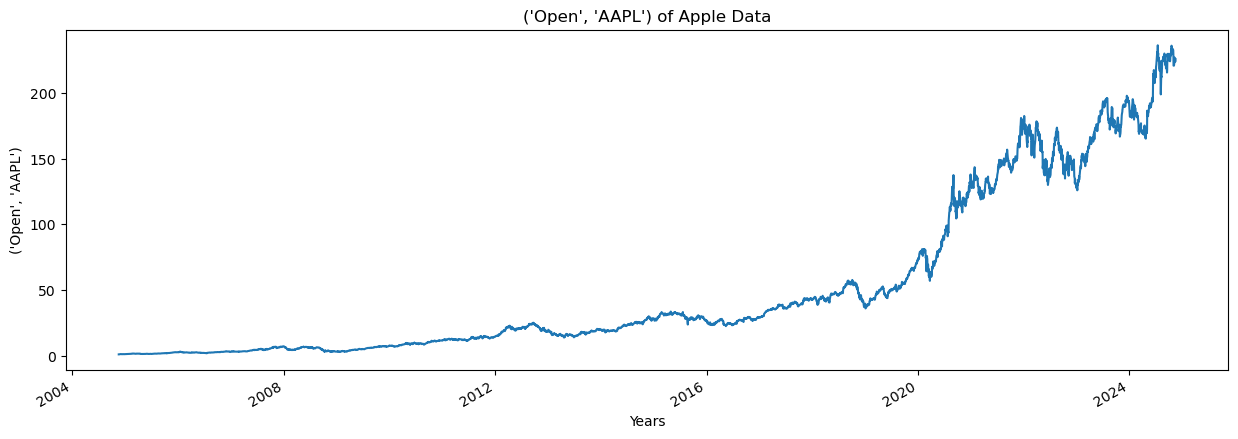

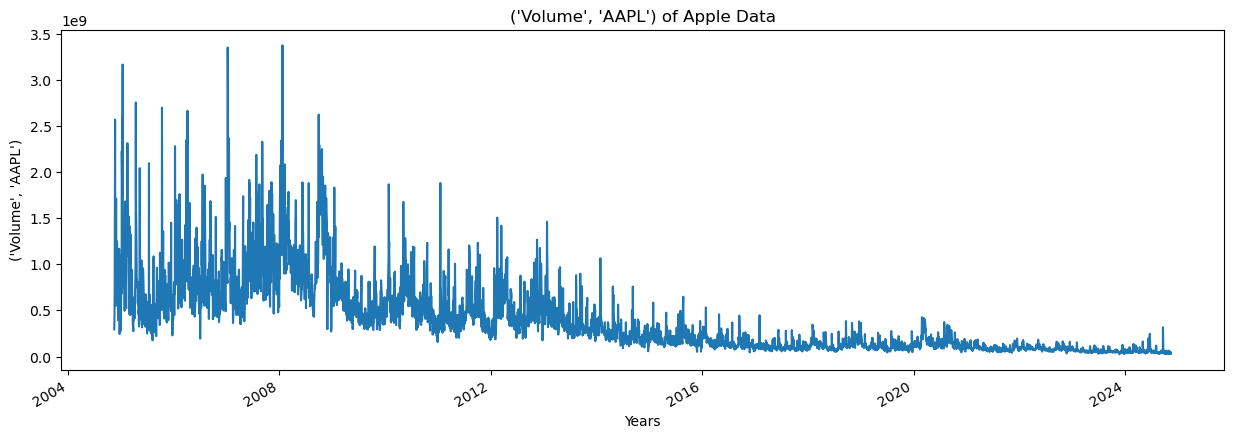

In [69]:
# Plot each column
for column in apple_data.columns:
    plot_graph((15, 5), apple_data[column], column)

In [71]:
# Number of working days in each year
for year in range(2004, 2025):
    print(year, list(apple_data.index.year).count(year))


2004 32
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 222


Date
2005-11-04 00:00:00+00:00         NaN
2005-11-07 00:00:00+00:00         NaN
2005-11-08 00:00:00+00:00         NaN
2005-11-09 00:00:00+00:00         NaN
2005-11-10 00:00:00+00:00    1.251998
Name: MA_for_250_days, dtype: float64


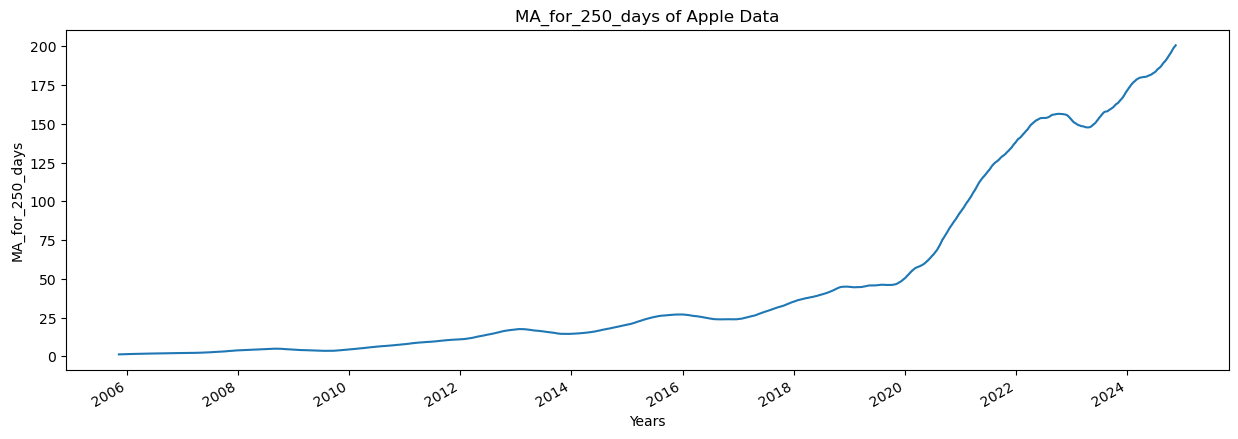

<Figure size 1500x500 with 0 Axes>

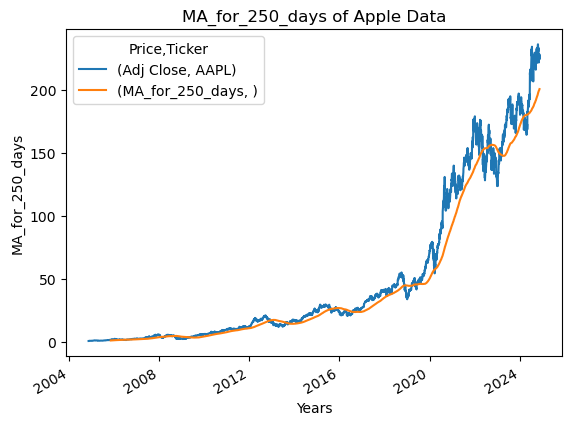

In [73]:
# 250-Day Moving Average:
apple_data['MA_for_250_days'] = apple_data['Adj Close'].rolling(250).mean()
print(apple_data['MA_for_250_days'][0:250].tail())

plot_graph((15, 5), apple_data['MA_for_250_days'], 'MA_for_250_days')
plot_graph((15, 5), apple_data[['Adj Close', 'MA_for_250_days']], 'MA_for_250_days')

<Figure size 1500x500 with 0 Axes>

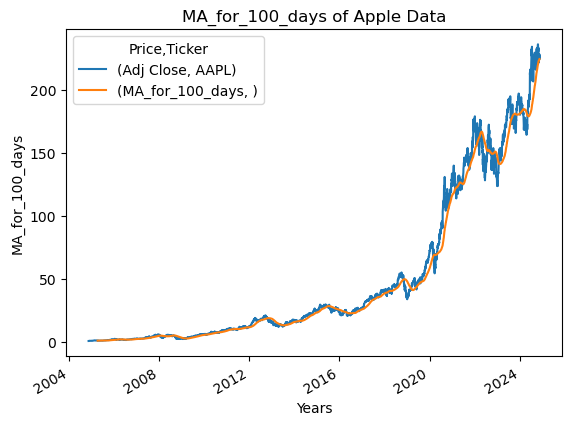

In [75]:
# 100-Day Moving Average:
apple_data['MA_for_100_days'] = apple_data['Adj Close'].rolling(100).mean()
plot_graph((15, 5), apple_data[['Adj Close', 'MA_for_100_days']], 'MA_for_100_days')


<Figure size 1500x500 with 0 Axes>

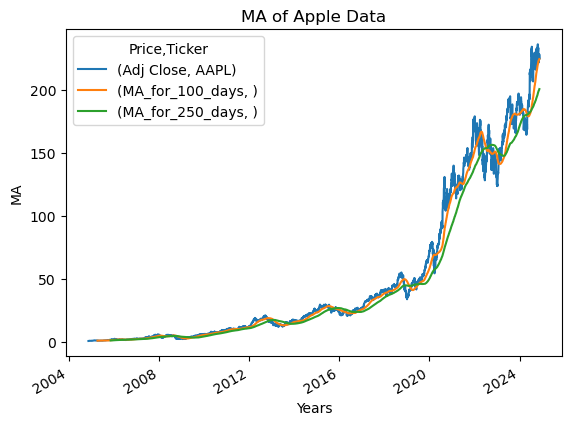

In [77]:
# Combined Plot of Moving Averages:
plot_graph((15, 5), apple_data[['Adj Close', 'MA_for_100_days', 'MA_for_250_days']], 'MA')

In [79]:
# Calculate percentage change in closing price
apple_data['percentage_change_closeprice'] = apple_data['Adj Close'].pct_change()
print(apple_data[['Adj Close', 'percentage_change_closeprice']].head())

Price                     Adj Close percentage_change_closeprice
Ticker                         AAPL                             
Date                                                            
2004-11-16 00:00:00+00:00  0.827580                          NaN
2004-11-17 00:00:00+00:00  0.826977                    -0.000728
2004-11-18 00:00:00+00:00  0.834358                     0.008925
2004-11-19 00:00:00+00:00  0.831045                    -0.003971
2004-11-22 00:00:00+00:00  0.924136                     0.112017


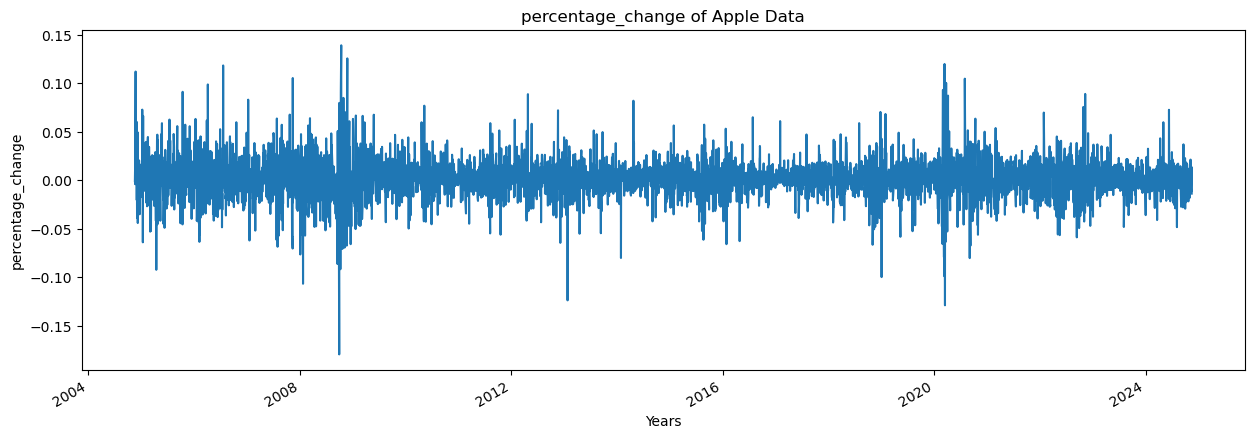

In [81]:
# Plot the percentage change
plot_graph((15, 5), apple_data['percentage_change_closeprice'], 'percentage_change')

In [83]:
# Inspect adjusted close price range
adj_close_price = apple_data[['Adj Close']]
print("Maximum Adjusted Close Price:", max(adj_close_price.values))
print("Minimum Adjusted Close Price:", min(adj_close_price.values))

Maximum Adjusted Close Price: [236.22010803]
Minimum Adjusted Close Price: [0.82697743]


Comparison


<Figure size 1500x500 with 0 Axes>

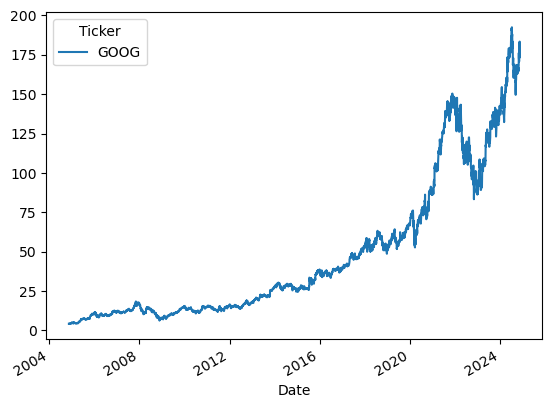

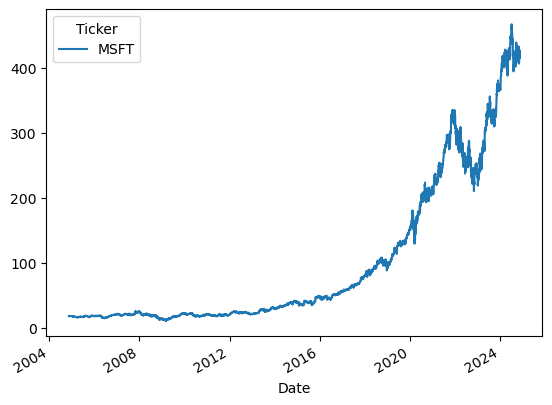

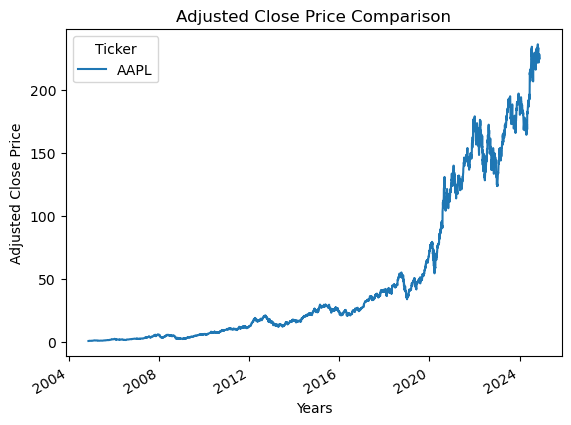

In [85]:
# Plot Adjusted Close Price for Google, Microsoft, and Apple
plt.figure(figsize=(15, 5))
google_data['Adj Close'].plot(label='Google', legend=True)
microsoft_data['Adj Close'].plot(label='Microsoft', legend=True)
apple_data['Adj Close'].plot(label='Apple', legend=True)
plt.title('Adjusted Close Price Comparison')
plt.ylabel('Adjusted Close Price')
plt.xlabel('Years')
plt.show()

<Figure size 1500x500 with 0 Axes>

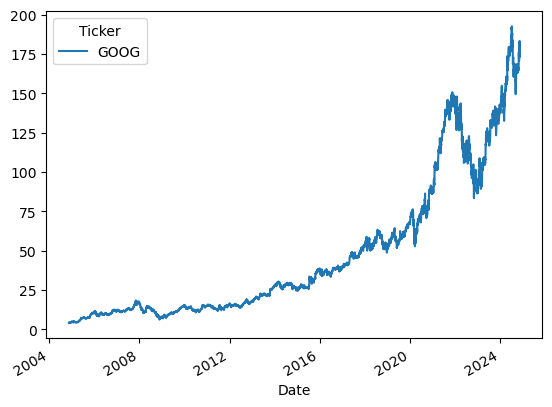

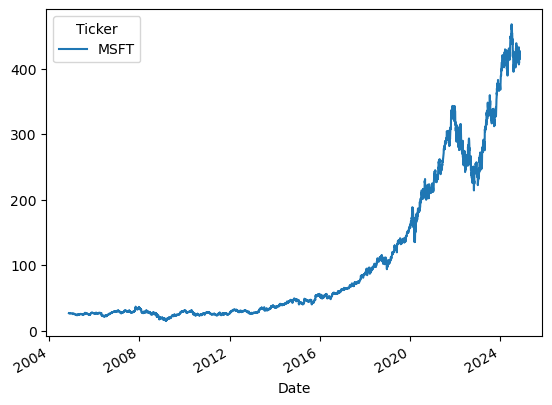

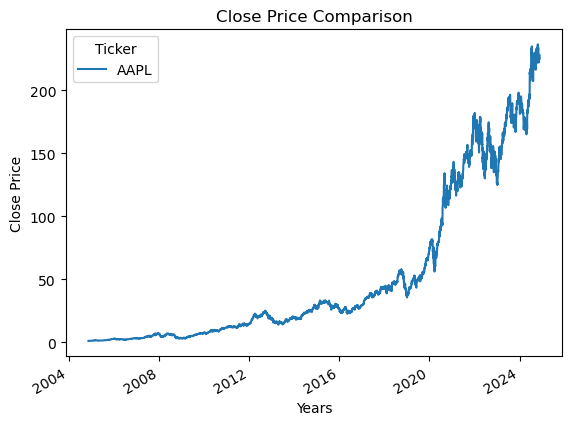

In [87]:
# Plot Close Price for Google, Microsoft, and Apple
plt.figure(figsize=(15, 5))
google_data['Close'].plot(label='Google', legend=True)
microsoft_data['Close'].plot(label='Microsoft', legend=True)
apple_data['Close'].plot(label='Apple', legend=True)
plt.title('Close Price Comparison')
plt.ylabel('Close Price')
plt.xlabel('Years')
plt.show()

<Figure size 1500x500 with 0 Axes>

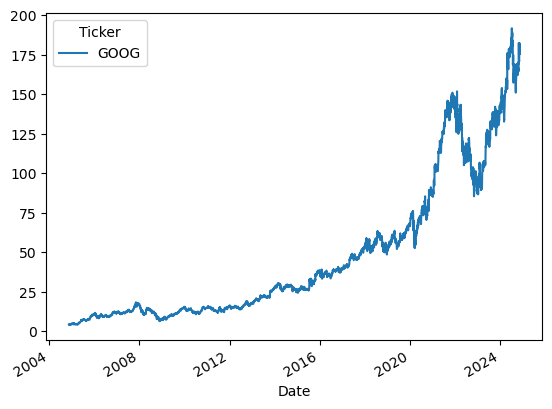

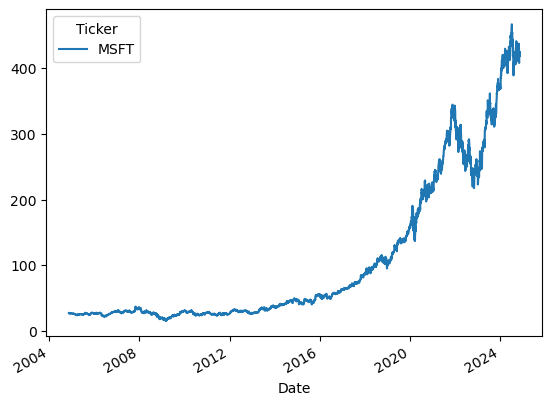

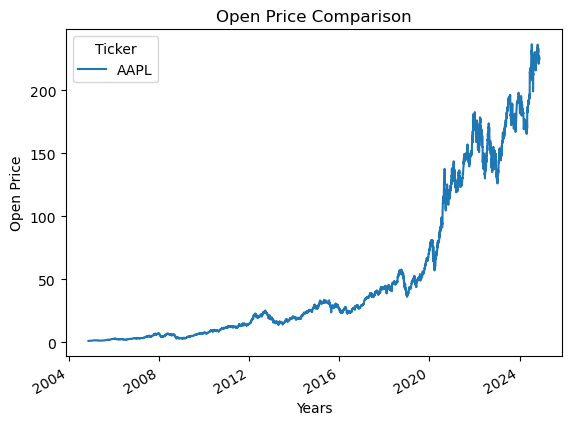

In [89]:
# Plot Open Price for Google, Microsoft, and Apple
plt.figure(figsize=(15, 5))
google_data['Open'].plot(label='Google', legend=True)
microsoft_data['Open'].plot(label='Microsoft', legend=True)
apple_data['Open'].plot(label='Apple', legend=True)
plt.title('Open Price Comparison')
plt.ylabel('Open Price')
plt.xlabel('Years')
plt.show()

<Figure size 1500x500 with 0 Axes>

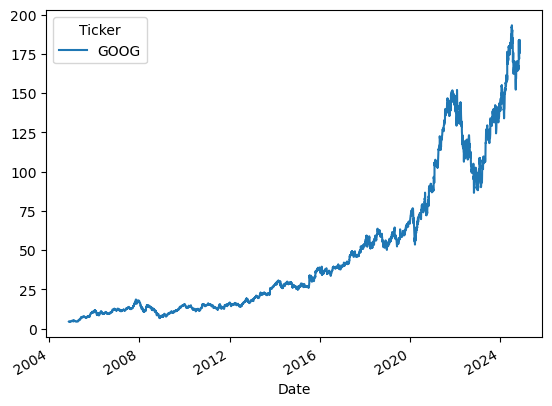

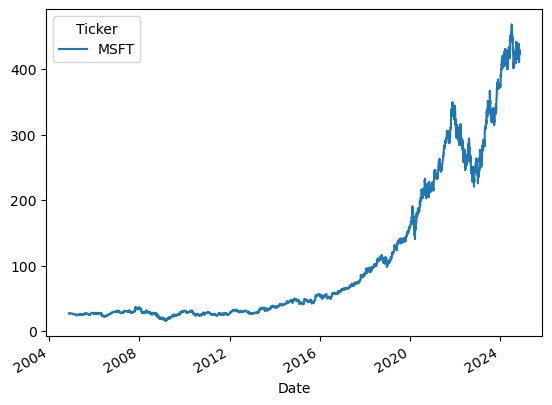

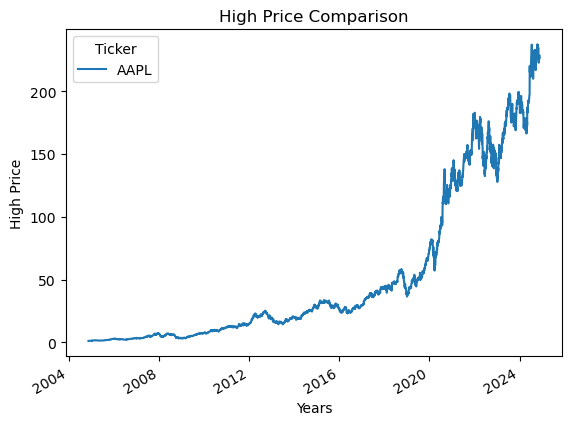

In [91]:
# Plot High Price for Google, Microsoft, and Apple
plt.figure(figsize=(15, 5))
google_data['High'].plot(label='Google', legend=True)
microsoft_data['High'].plot(label='Microsoft', legend=True)
apple_data['High'].plot(label='Apple', legend=True)
plt.title('High Price Comparison')
plt.ylabel('High Price')
plt.xlabel('Years')
plt.show()

<Figure size 1500x500 with 0 Axes>

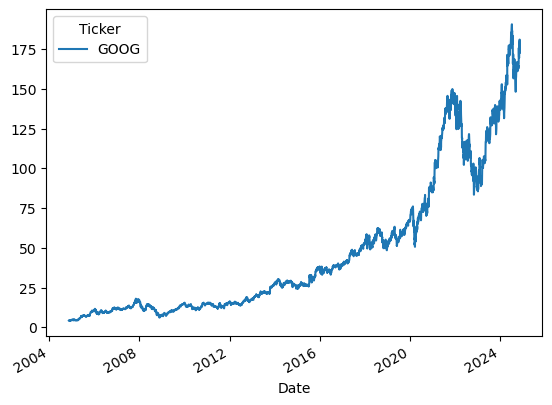

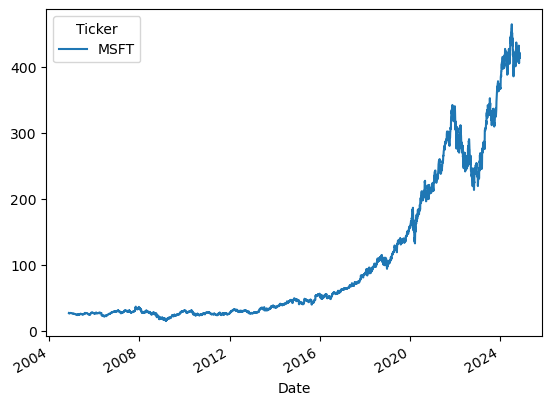

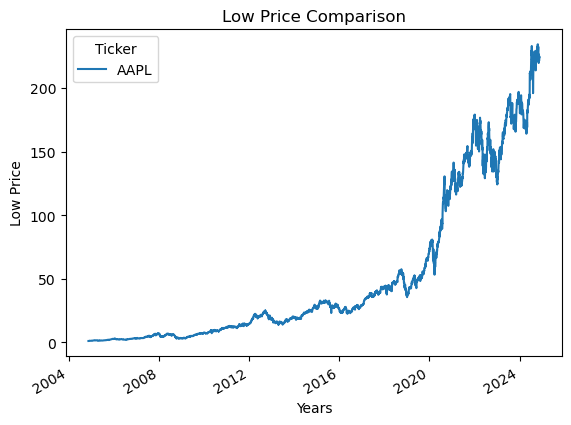

In [93]:
# Plot Low Price for Google, Microsoft, and Apple
plt.figure(figsize=(15, 5))
google_data['Low'].plot(label='Google', legend=True)
microsoft_data['Low'].plot(label='Microsoft', legend=True)
apple_data['Low'].plot(label='Apple', legend=True)
plt.title('Low Price Comparison')
plt.ylabel('Low Price')
plt.xlabel('Years')
plt.show()

<Figure size 1500x500 with 0 Axes>

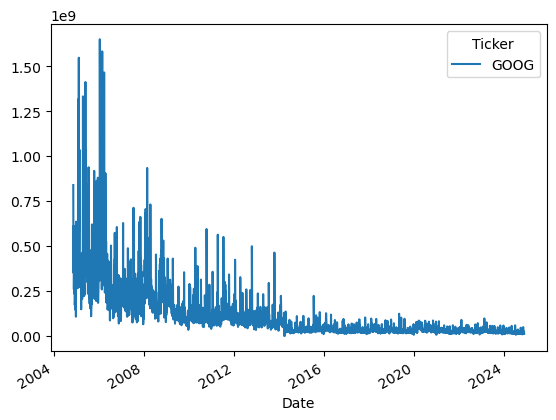

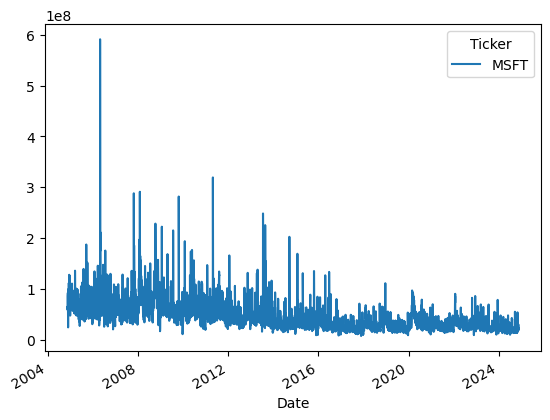

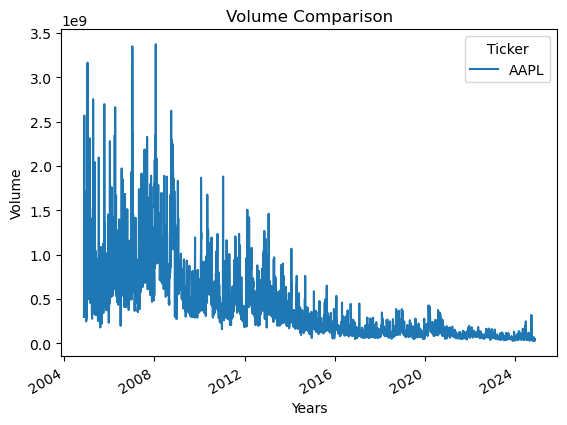

In [95]:
# Plot Volume for Google, Microsoft, and Apple
plt.figure(figsize=(15, 5))
google_data['Volume'].plot(label='Google', legend=True)
microsoft_data['Volume'].plot(label='Microsoft', legend=True)
apple_data['Volume'].plot(label='Apple', legend=True)
plt.title('Volume Comparison')
plt.ylabel('Volume')
plt.xlabel('Years')
plt.show()

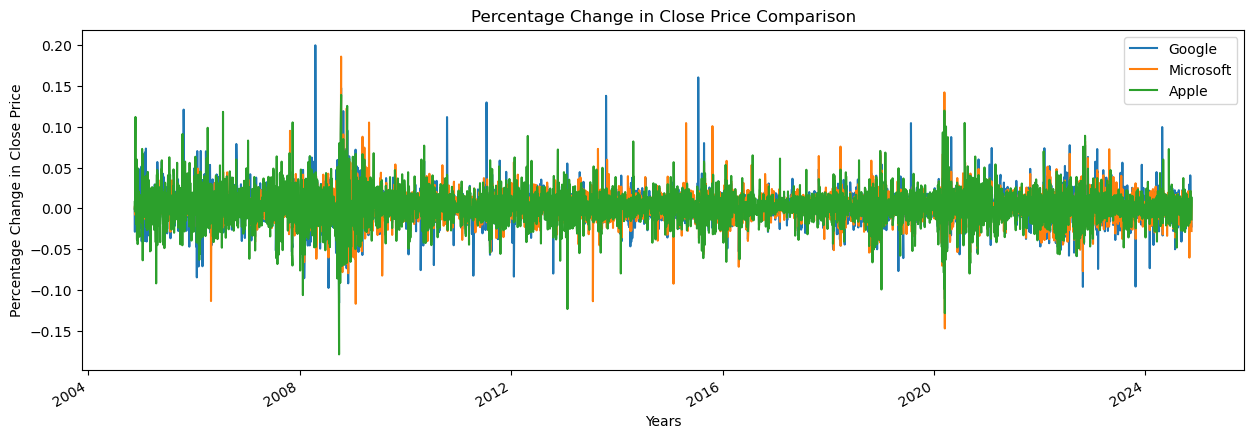

In [97]:
# Plot Percentage Change in Close Price for Google, Microsoft, and Apple
plt.figure(figsize=(15, 5))
google_data['percentage_change_closeprice'].plot(label='Google', legend=True)
microsoft_data['percentage_change_closeprice'].plot(label='Microsoft', legend=True)
apple_data['percentage_change_closeprice'].plot(label='Apple', legend=True)
plt.title('Percentage Change in Close Price Comparison')
plt.ylabel('Percentage Change in Close Price')
plt.xlabel('Years')
plt.show()

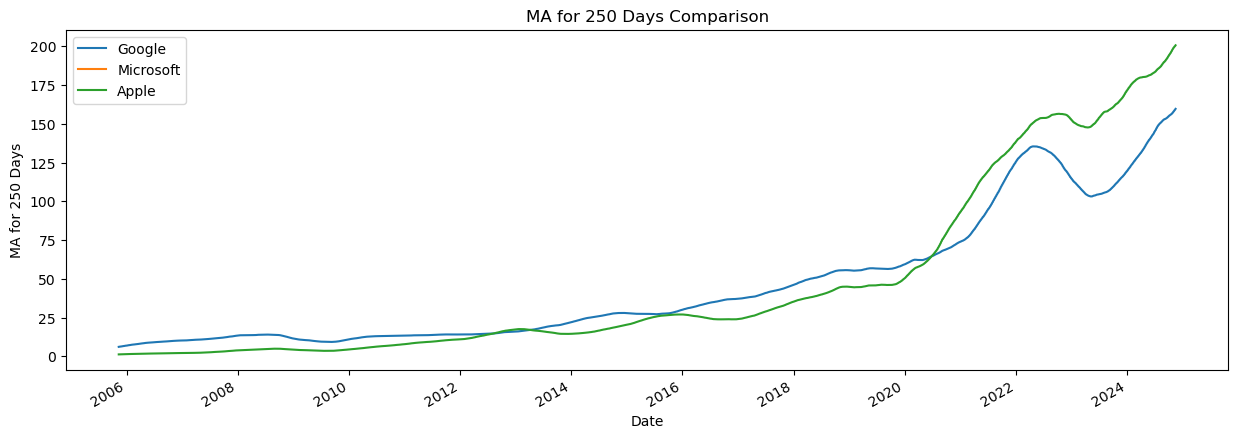

In [99]:
# Plot MA for 250 days for Google, Microsoft, and Apple
plt.figure(figsize=(15, 5))
google_data['MA_for_250_days'].plot(label='Google', legend=True)
microsoft_data['MA_for_250_days'].plot(label='Microsoft', legend=True)
apple_data['MA_for_250_days'].plot(label='Apple', legend=True)
plt.title('MA for 250 Days Comparison')
plt.ylabel('MA for 250 Days')
plt.show()

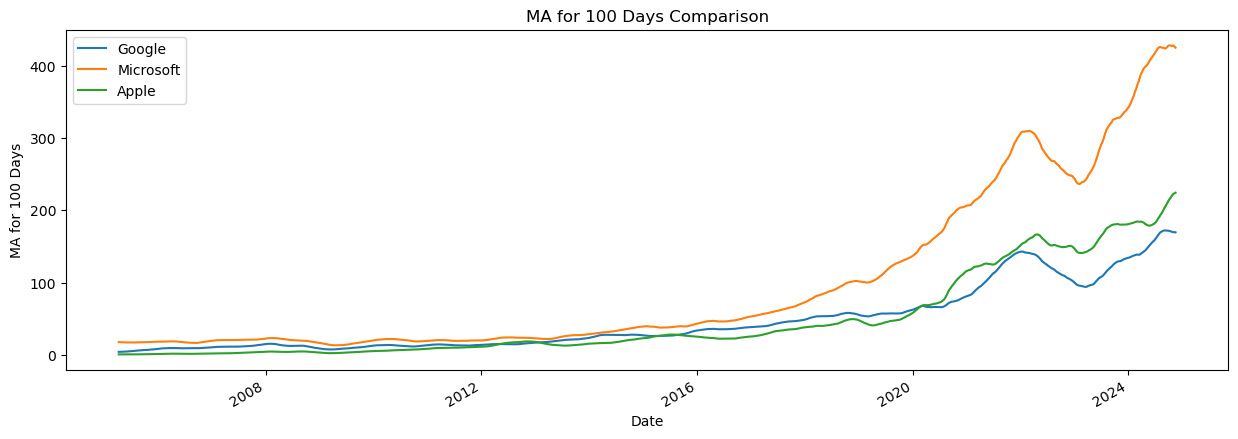

In [101]:
# Plot MA for 100 days for Google, Microsoft, and Apple
plt.figure(figsize=(15, 5))
google_data['MA_for_100_days'].plot(label='Google', legend=True)
microsoft_data['MA_for_100_days'].plot(label='Microsoft', legend=True)
apple_data['MA_for_100_days'].plot(label='Apple', legend=True)
plt.title('MA for 100 Days Comparison')
plt.ylabel('MA for 100 Days')
plt.show()

ARIMA Model


In [103]:
# ARIMA Model
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [105]:
# Function to train and forecast using ARIMA for individual datasets
def arima_forecast(stock_data, stock_name, order=(5, 1, 0)):
    adj_close_prices = stock_data['Adj Close']
    
    # Split the data into training and testing sets
    split_ratio = 0.8
    split_index = int(len(adj_close_prices) * split_ratio)
    train_data = adj_close_prices[:split_index]
    test_data = adj_close_prices[split_index:]
    
    # Train the ARIMA model
    model = ARIMA(train_data, order=order)
    model_fit = model.fit()
    
    # Summary of the model
    print(f"ARIMA Model Summary for {stock_name}:")
    print(model_fit.summary())
    
    # Forecast the test data period
    forecast = model_fit.forecast(steps=len(test_data))
    
    # Calculate and print the Mean Squared Error (MSE)
    arima_mse = mean_squared_error(test_data, forecast)
    print(f'ARIMA Mean Squared Error: {arima_mse}')
    
    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(train_data, label='Training Data')
    plt.plot(test_data, label='Actual Data')
    plt.plot(forecast, label='Forecast', color='red')
    plt.title(f'{stock_name} Stock Forecast')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.show()


D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Model Summary for Google:
                               SARIMAX Results                                
Dep. Variable:                   GOOG   No. Observations:                 4028
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3599.117
Date:                Sat, 16 Nov 2024   AIC                           7210.233
Time:                        03:13:39   BIC                           7248.038
Sample:                             0   HQIC                          7223.629
                               - 4028                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1023      0.006    -16.323      0.000      -0.115      -0.090
ar.L2          0.0144      0.006      2.345      0.019       0.002       0.026
ar.L3          0.012

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


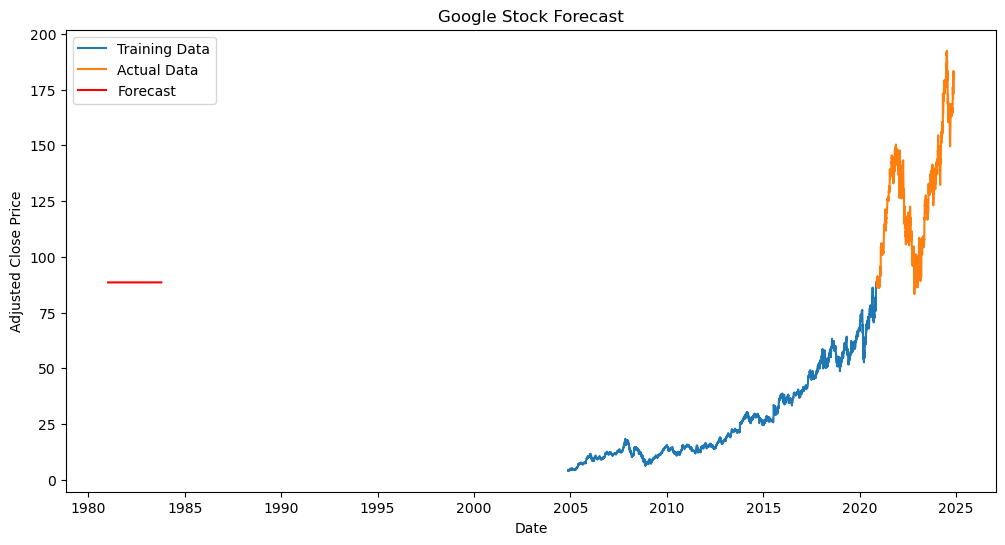

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Model Summary for Microsoft:
                               SARIMAX Results                                
Dep. Variable:                   MSFT   No. Observations:                 4028
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6703.392
Date:                Sat, 16 Nov 2024   AIC                          13418.785
Time:                        03:13:40   BIC                          13456.589
Sample:                             0   HQIC                         13432.181
                               - 4028                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2666      0.004    -66.258      0.000      -0.274      -0.259
ar.L2          0.0356      0.004      8.100      0.000       0.027       0.044
ar.L3          0.

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


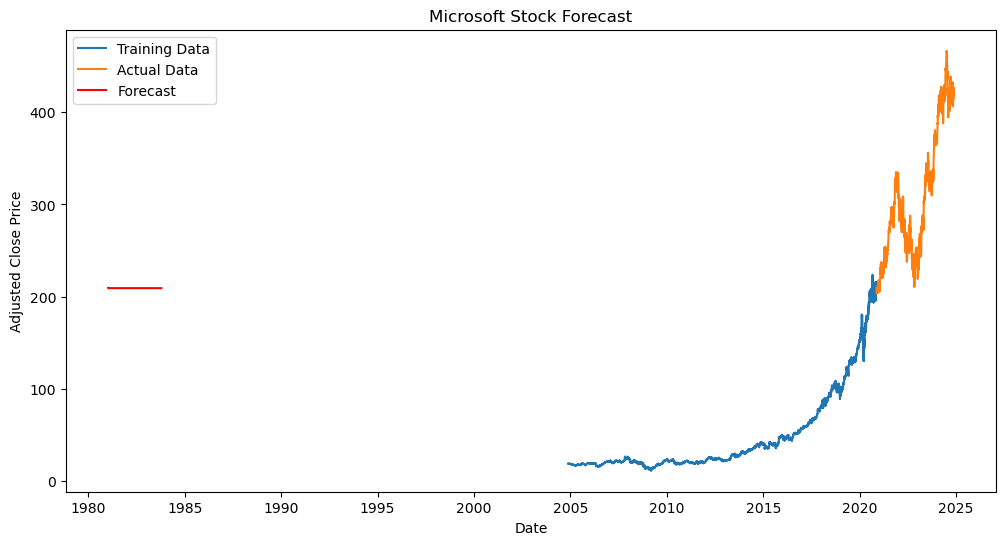

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Model Summary for Apple:
                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 4028
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4269.824
Date:                Sat, 16 Nov 2024   AIC                           8551.648
Time:                        03:13:41   BIC                           8589.453
Sample:                             0   HQIC                          8565.045
                               - 4028                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1244      0.004    -28.000      0.000      -0.133      -0.116
ar.L2          0.0420      0.004     11.640      0.000       0.035       0.049
ar.L3         -0.0257

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


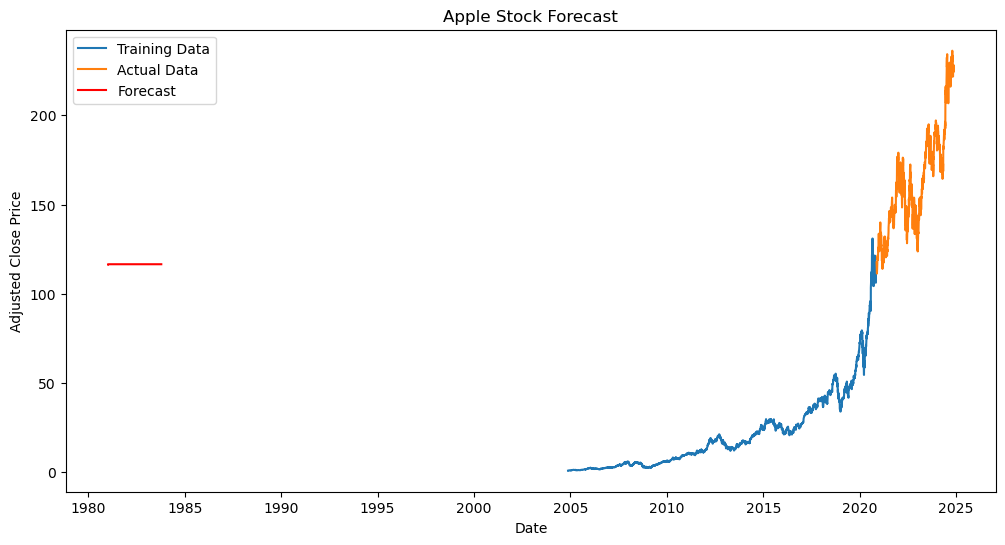

In [107]:
# Forecast for Google, Microsoft, and Apple
arima_forecast(google_data, 'Google')
arima_forecast(microsoft_data, 'Microsoft')
arima_forecast(apple_data, 'Apple')

In [109]:
# Future Prediction For the Next 2 Years
def arima_forecast_future(stock_data, stock_name, order=(5, 1, 0), forecast_days=730):
    adj_close_prices = stock_data['Adj Close']
    
    # Train the ARIMA model
    model = ARIMA(adj_close_prices, order=order)
    model_fit = model.fit()
    
    # Forecast the future stock prices for the next 2 Years (approximately 730 days)
    future_forecast = model_fit.forecast(steps=forecast_days)
    
    # Plot the actual data and future forecast
    plt.figure(figsize=(12, 6))
    plt.plot(adj_close_prices, label='Actual Data')
    plt.plot(pd.date_range(start=adj_close_prices.index[-1], periods=forecast_days), future_forecast, label='Future Forecast', color='green')
    plt.title(f'Future Stock Price Forecast for {stock_name} - 2 Years')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.show()


D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_m

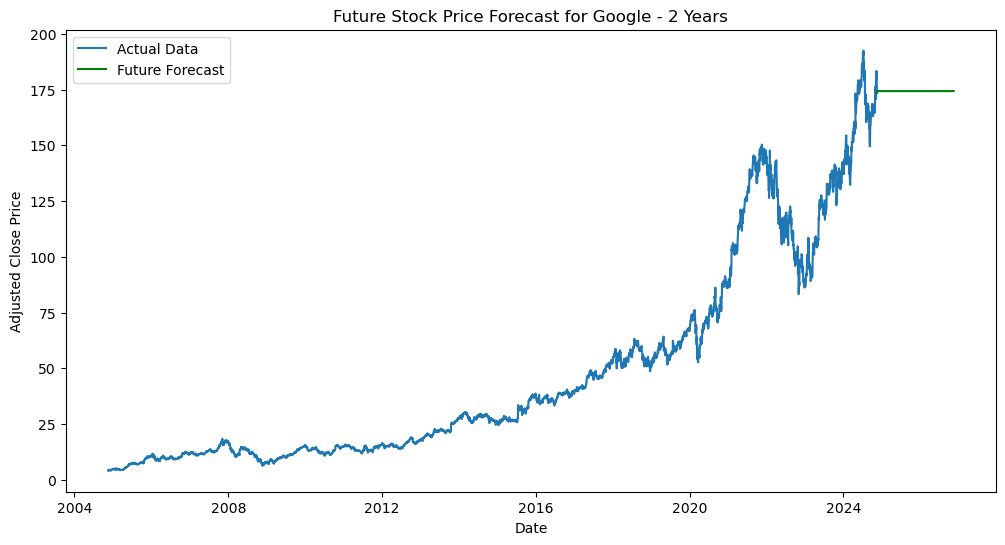

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_m

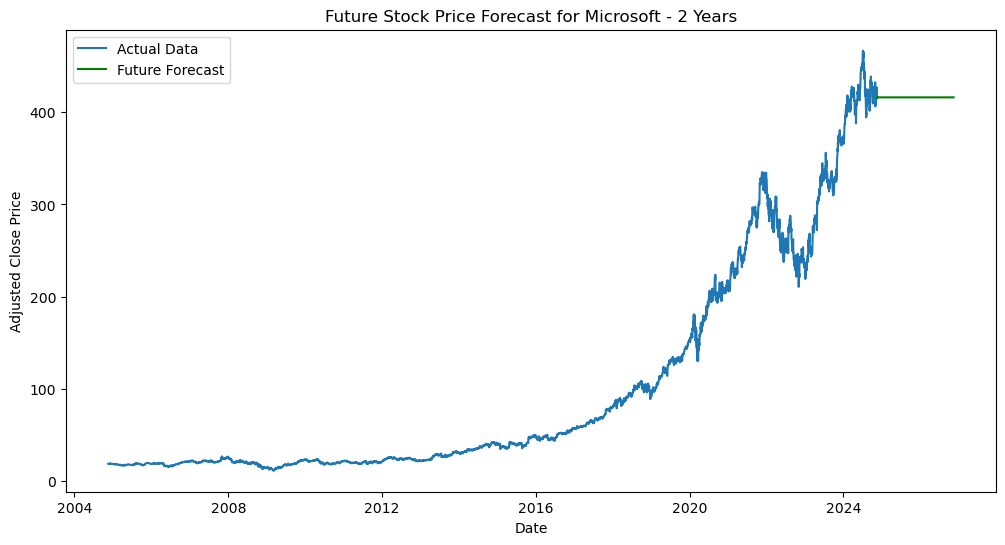

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_m

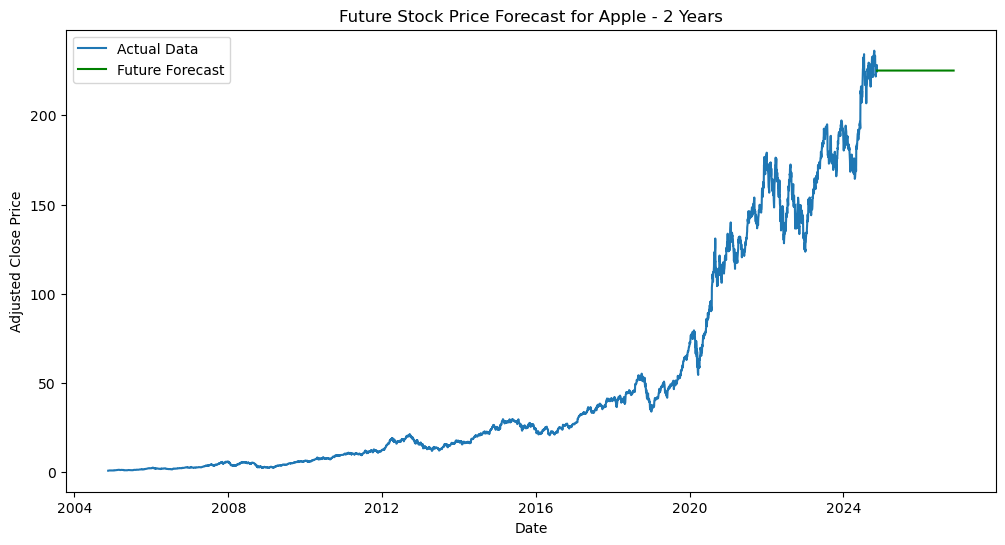

In [111]:
# Forecast for Google, Microsoft, and Apple (2 years)
arima_forecast_future(google_data, 'Google')
arima_forecast_future(microsoft_data, 'Microsoft')
arima_forecast_future(apple_data, 'Apple')

XGBoost Regressor

In [117]:
#XGBoost Regressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [119]:
# Prepare data for XGBoost
def prepare_data(stock_data, n_lag=5):
    X, y = [], []
    adj_close_values = stock_data['Adj Close'].values
    for i in range(n_lag, len(adj_close_values)):
        X.append(adj_close_values[i-n_lag:i])
        y.append(adj_close_values[i])
    
    X, y = np.array(X), np.array(y)
    X = X.reshape(X.shape[0], X.shape[1])
    return X, y


In [121]:
# XGBoost model function
def xgboost_forecast(stock_data, stock_name, n_lag=5):
    X, y = prepare_data(stock_data, n_lag)
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Create and train the XGBoost model
    xgb_model = XGBRegressor(n_estimators=1000, random_state=42)
    xgb_model.fit(X_train, y_train)
    
    # Make predictions
    predictions = xgb_model.predict(X_test)
    
    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Data')
    plt.plot(np.arange(len(predictions)), predictions, label='Predicted Data', color='red')
    plt.title(f'{stock_name} Stock Prediction using XGBoost')
    plt.xlabel('Time')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.show()
    
    # Calculate and print RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f'{stock_name} RMSE: {rmse}')

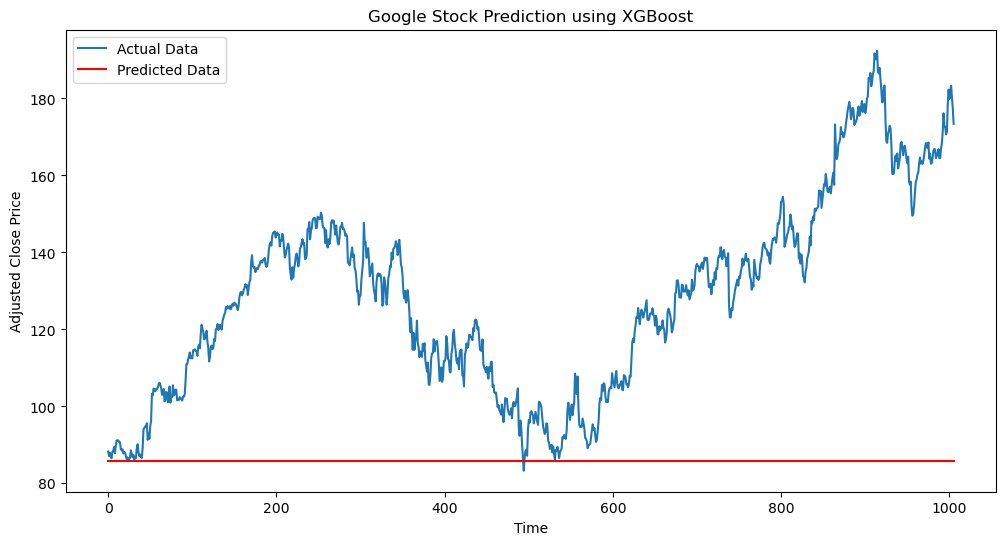

Google RMSE: 49.28600576818673


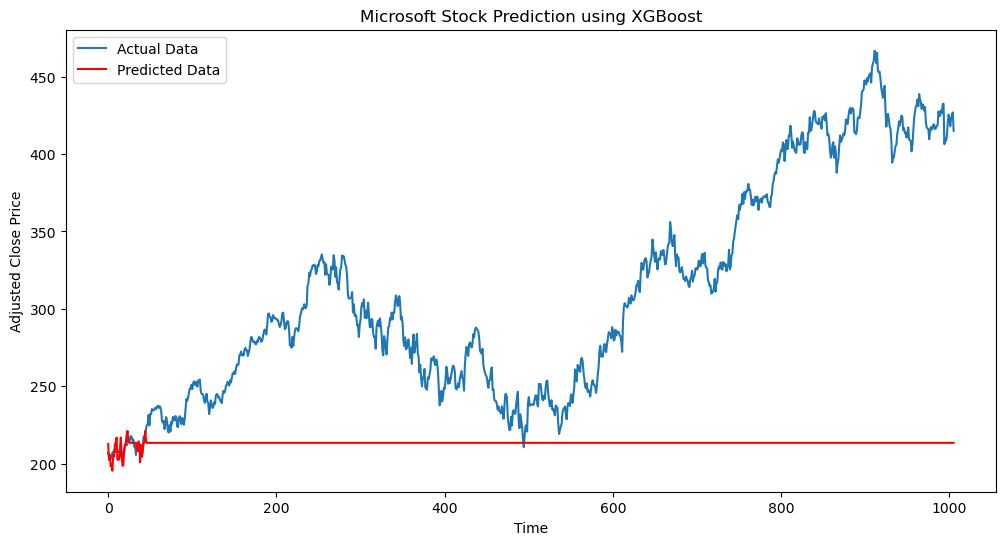

Microsoft RMSE: 118.06441059635443


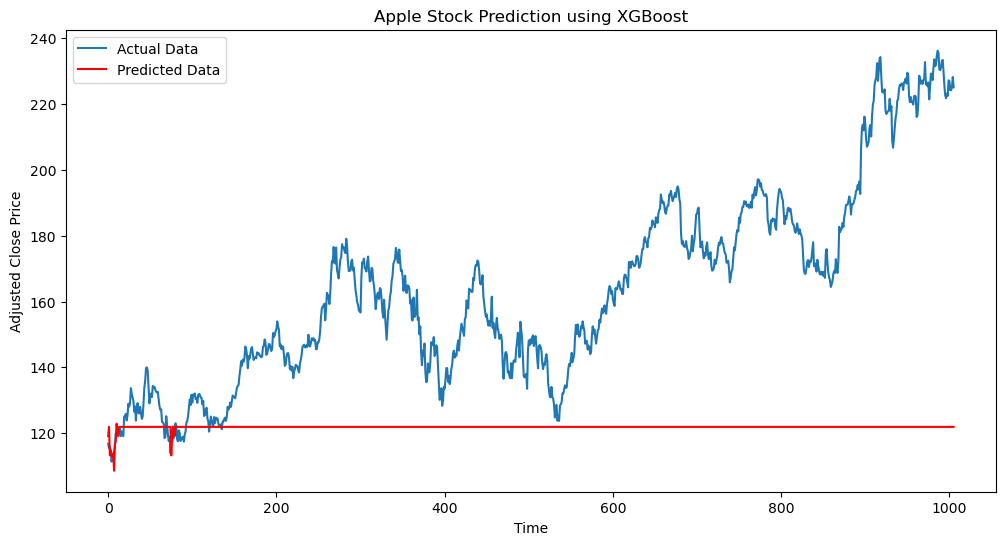

Apple RMSE: 51.024094686988576


In [123]:
# Example usage with stock data (Assuming google_data, microsoft_data, apple_data are DataFrames)
xgboost_forecast(google_data, 'Google')
xgboost_forecast(microsoft_data, 'Microsoft')
xgboost_forecast(apple_data, 'Apple')

In [125]:
# Future Prediction For the Next 2 Years
def xgboost_forecast_future(stock_data, stock_name, n_lag=5, forecast_days=504):
    X, y = prepare_data(stock_data, n_lag)
    
    # Train the model on the entire dataset
    xgb_model = XGBRegressor(n_estimators=1000, random_state=42)
    xgb_model.fit(X, y)
    
    # Start with the last known data point
    last_data = X[-1].reshape(1, -1)
    
    # Predict future prices
    future_forecast = []
    for _ in range(forecast_days):
        next_pred = xgb_model.predict(last_data)[0]
        future_forecast.append(next_pred)
        last_data = np.append(last_data[:, 1:], [[next_pred]], axis=1)
    
    # Generate future dates for plotting
    future_dates = pd.date_range(start=stock_data.index[-1] + pd.Timedelta(days=1), periods=forecast_days, freq='B')
    
    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data['Adj Close'], label='Actual Data')
    plt.plot(future_dates, future_forecast, label='Future Forecast', color='green')
    plt.title(f'{stock_name} Stock Forecast for the Next 2 Years (XGBoost)')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.show()


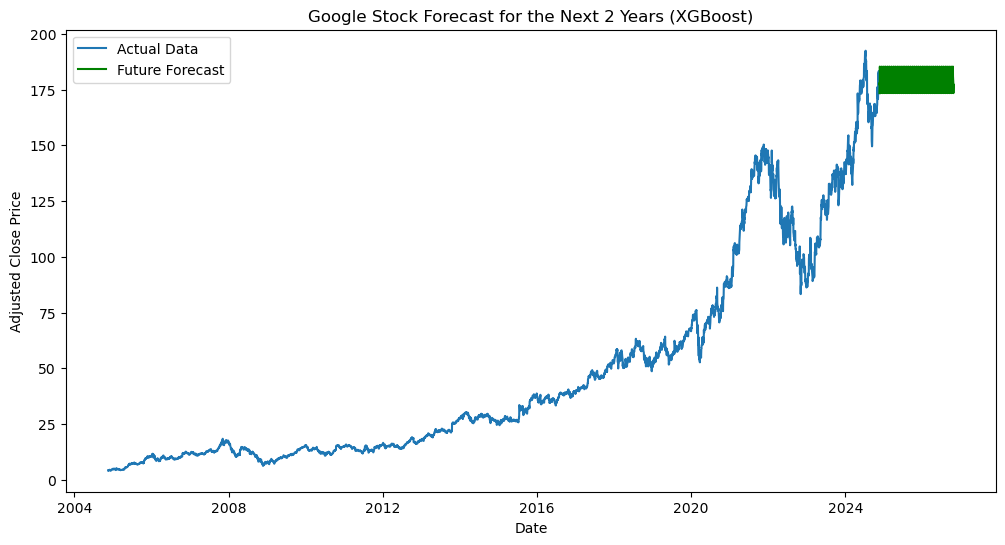

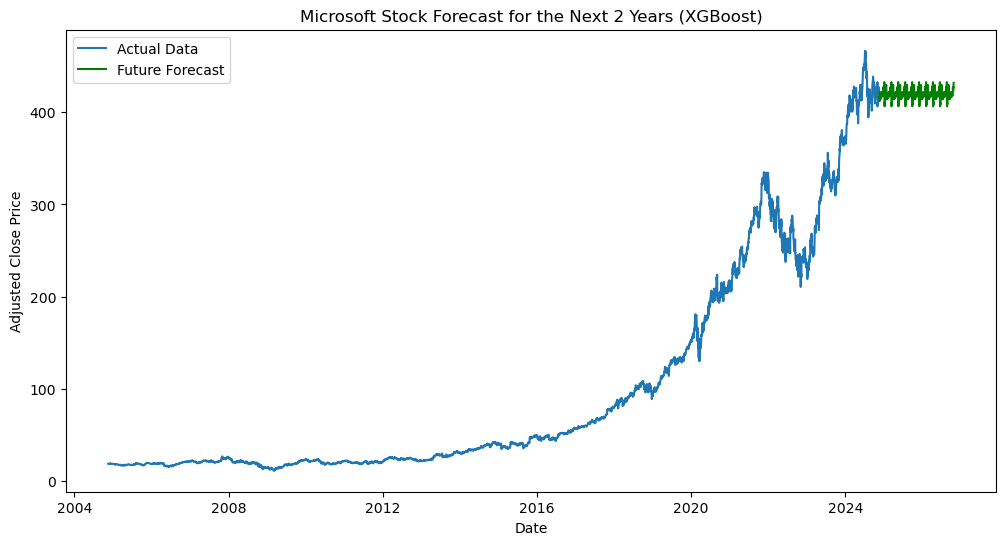

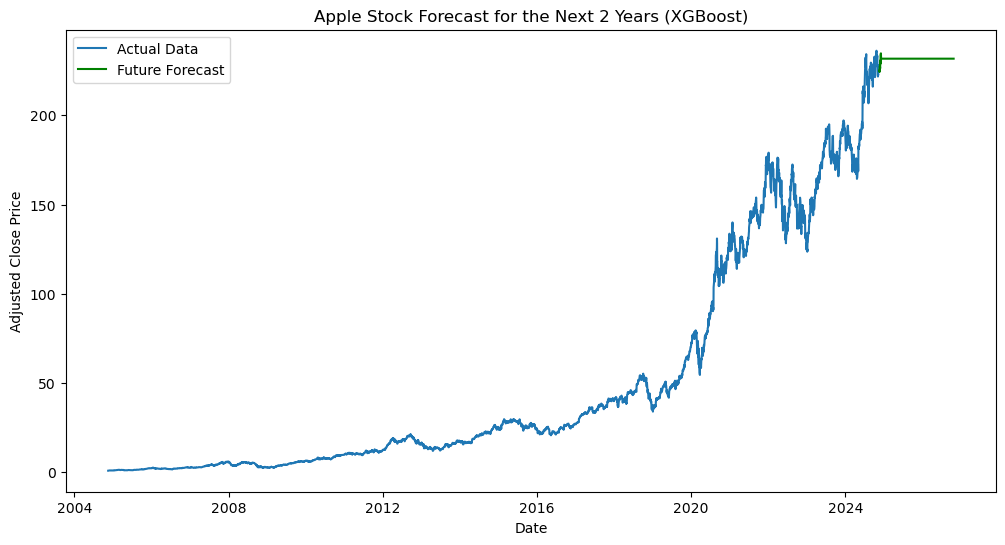

In [127]:
# Run XGBoost forecast for all datasets (Google, Microsoft, Apple)
xgboost_forecast_future(google_data, 'Google')
xgboost_forecast_future(microsoft_data, 'Microsoft')
xgboost_forecast_future(apple_data, 'Apple')


LSTM (Long Short-Term Memory)

In [145]:
#LSTM Model
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import matplotlib.pyplot as plt

In [147]:
# Prepare data for LSTM
def prepare_data_lstm(stock_data, n_lag=5):
    # If stock_data is already a NumPy array after scaling, no need for column access
    adj_close_values_scaled = stock_data  # stock_data is now scaled and is a NumPy array
    
    X, y = [], []
    for i in range(n_lag, len(adj_close_values_scaled)):
        X.append(adj_close_values_scaled[i-n_lag:i, 0])  # Data for n_lag days
        y.append(adj_close_values_scaled[i, 0])  # Target for the current day

    X, y = np.array(X), np.array(y)
    X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM input
    return X, y

In [149]:
# LSTM model function
def lstm_forecast(stock_data, stock_name, n_lag=5):
    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_data['Adj Close'].values.reshape(-1, 1))
    
    # Prepare data for LSTM
    X, y = prepare_data_lstm(scaled_data, n_lag)
    
    # Split the data into training and test sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    # Build the LSTM model
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.LSTM(units=50, return_sequences=False),
        tf.keras.layers.Dense(units=1)
    ])
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32)
    
    # Make predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_actual, label='Actual Data')
    plt.plot(predictions, label='Predicted Data', color='red')
    plt.title(f'{stock_name} Stock Prediction using LSTM')
    plt.xlabel('Time')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.show()
    
    # Calculate and print RMSE
    rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
    print(f'{stock_name} RMSE: {rmse}')

Epoch 1/10


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


126/126 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0065
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.0420e-05
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.8014e-05
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.0531e-05
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.7395e-05
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.5037e-05
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.6951e-05
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.8512e-05
Epoch 9/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.7914e-05
Epoch 10/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.9932e-05
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


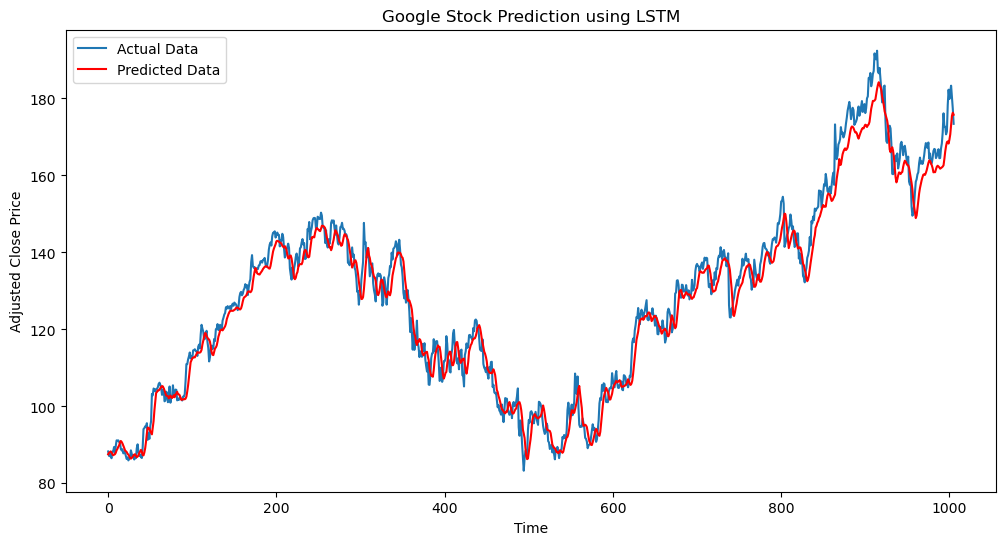

Google RMSE: 4.302235352439213
Epoch 1/10


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


126/126 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0028
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0784e-05
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8502e-05
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4895e-05
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0556e-05
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0258e-05
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4054e-05
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7941e-05
Epoch 9/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0794e-05
Epoch 10/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2669e-05
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


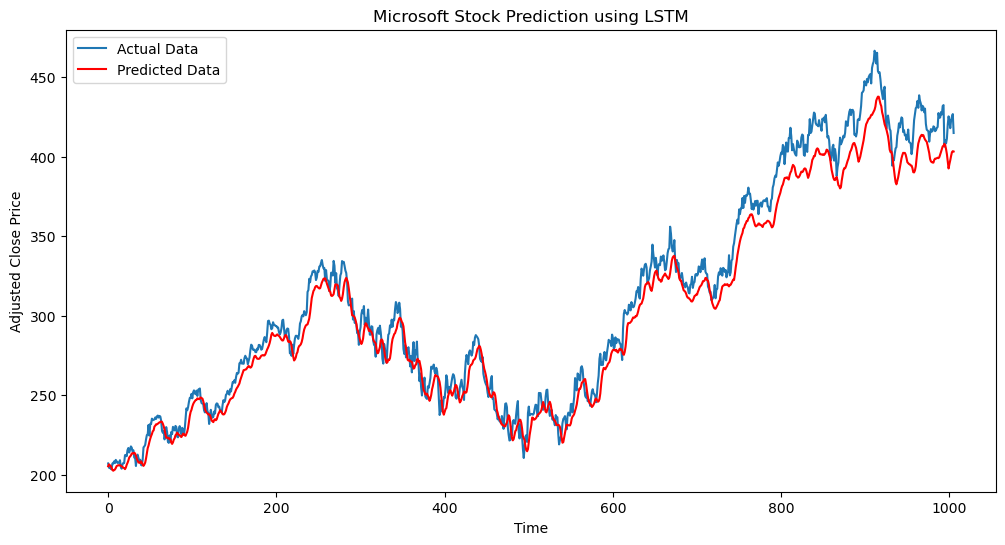

Microsoft RMSE: 13.049916809874535
Epoch 1/10


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


126/126 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0051
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0074e-05
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9601e-05
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5206e-05
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7366e-05
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7527e-05
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3872e-05
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8861e-05
Epoch 9/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2765e-05
Epoch 10/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.0491e-05
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


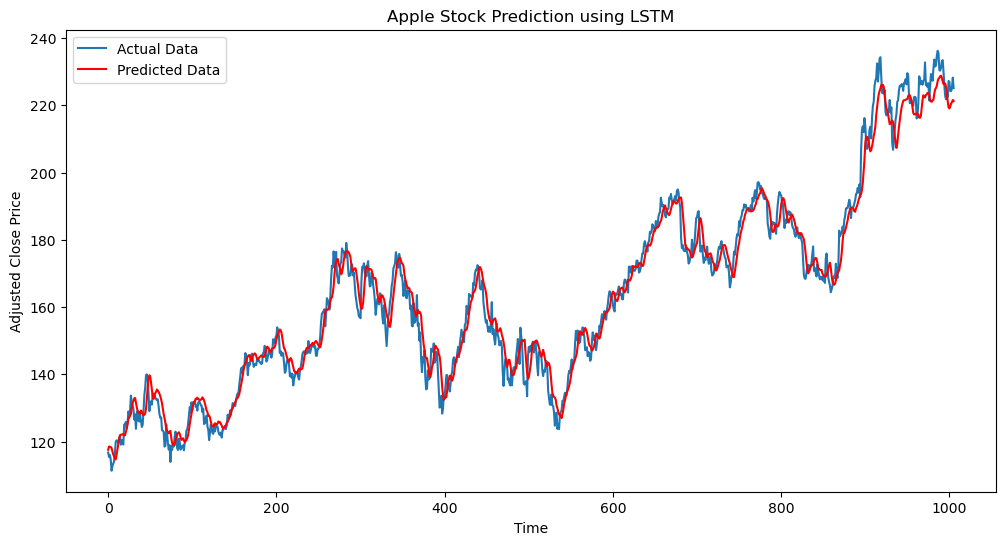

Apple RMSE: 4.633976767786491


In [151]:
# Example usage for stock data (assuming google_data, microsoft_data, apple_data are DataFrames)
lstm_forecast(google_data, 'Google')
lstm_forecast(microsoft_data, 'Microsoft')
lstm_forecast(apple_data, 'Apple')


In [157]:
# Future Prediction For the Next 2 Years (LSTM)
def lstm_forecast_future(stock_data, stock_name, time_step=60, forecast_days=504):
    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_data['Adj Close'].values.reshape(-1, 1))
    
    # Prepare data for future prediction
    X, _ = prepare_data_lstm(scaled_data, time_step)
    last_data = X[-1].reshape(1, time_step, 1)
    
    # Build and train the LSTM model
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)),
        tf.keras.layers.LSTM(units=50, return_sequences=False),
        tf.keras.layers.Dense(units=1)
    ])
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, scaled_data[time_step:], epochs=20, batch_size=32)
    
    # Predict future stock prices
    future_forecast = []
    for _ in range(forecast_days):
        next_pred = model.predict(last_data)
        future_forecast.append(next_pred[0, 0])
        
        # Reshape next_pred to be 3D to match last_data shape for concatenation
        next_pred_reshaped = next_pred.reshape(1, 1, 1)
        
        # Append the prediction to the last_data (shift the sequence window)
        last_data = np.append(last_data[:, 1:, :], next_pred_reshaped, axis=1)
    
    future_forecast = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))
    
    # Plot future forecast
    future_dates = pd.date_range(start=stock_data.index[-1] + pd.Timedelta(days=1), periods=forecast_days, freq='B')
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data['Adj Close'], label='Actual Data')
    plt.plot(future_dates, future_forecast, label='Future Forecast', color='green')
    plt.title(f'{stock_name} Stock Price Forecast using LSTM for the Next 2 Years')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.show()


Epoch 1/20


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.0083
Epoch 2/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 2.0476e-04
Epoch 3/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 2.0015e-04
Epoch 4/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.7412e-04
Epoch 5/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.6123e-04
Epoch 6/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 1.9208e-04
Epoch 7/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 1.6272e-04
Epoch 8/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.4980e-04
Epoch 9/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 1.2558e-04
Epoch 10/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 1.6080e-04
Epoch 11/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 1.0190e-04
Epoch 12/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 1.1081e-04
Epoch 13/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 1.1349e-04
Epoch 14/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.2465e-04
Ep

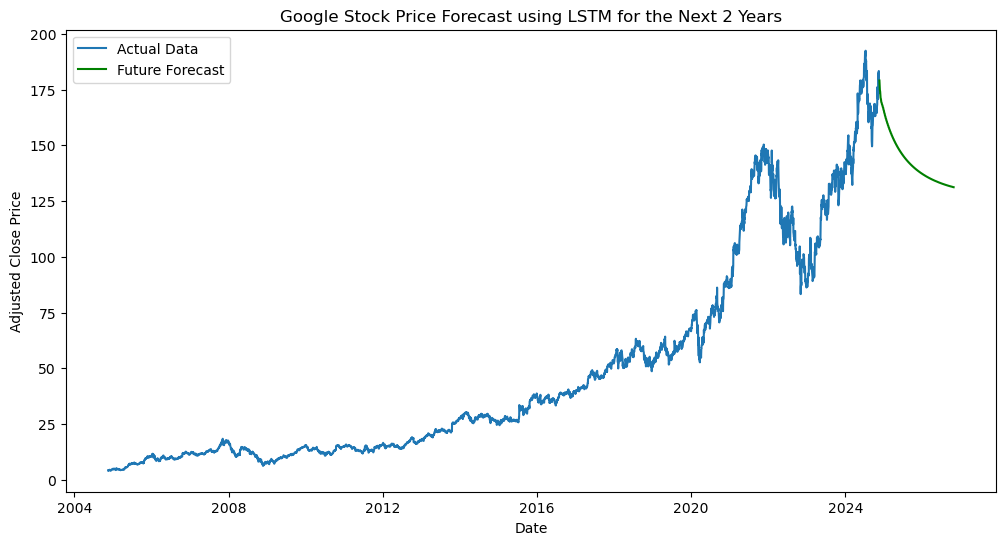

Epoch 1/20


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


156/156 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.0098
Epoch 2/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 1.7318e-04
Epoch 3/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.6311e-04
Epoch 4/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 1.8086e-04
Epoch 5/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 1.5239e-04
Epoch 6/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 1.3795e-04
Epoch 7/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.5603e-04
Epoch 8/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 1.1046e-04
Epoch 9/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.3223e-04
Epoch 10/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 1.5405e-04
Epoch 11/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 1.2319e-04
Epoch 12/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 1.0030e-04
Epoch 13/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 9.8482e-05
Epoch 14/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 1.2463e-04
Ep

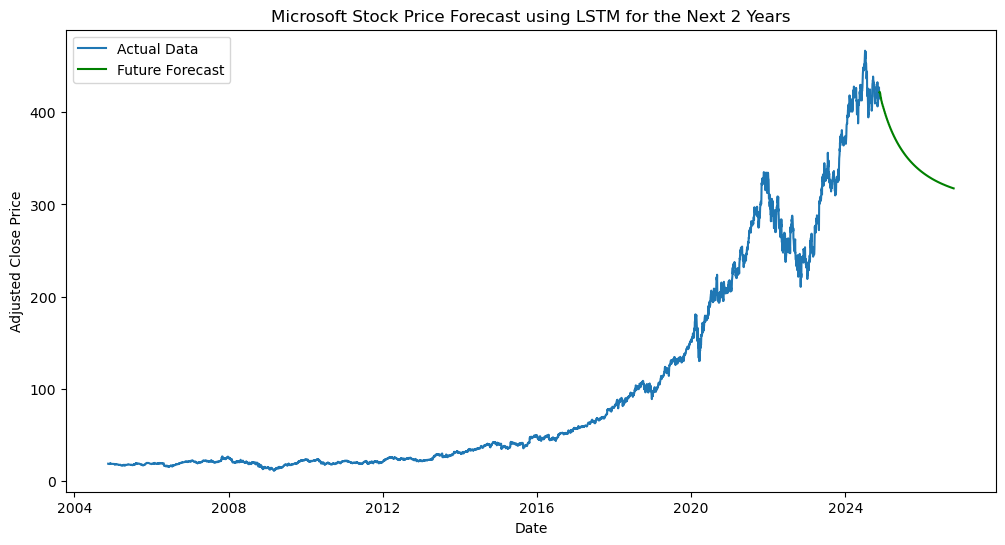

Epoch 1/20


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


156/156 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0140
Epoch 2/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 2.2641e-04
Epoch 3/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 2.0592e-04
Epoch 4/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.7728e-04
Epoch 5/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 2.3090e-04
Epoch 6/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 1.2625e-04
Epoch 7/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 1.4641e-04
Epoch 8/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.5721e-04
Epoch 9/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 1.2536e-04
Epoch 10/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 1.7449e-04
Epoch 11/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 1.0735e-04
Epoch 12/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 1.3162e-04
Epoch 13/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 1.0744e-04
Epoch 14/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.3576e-04
Ep

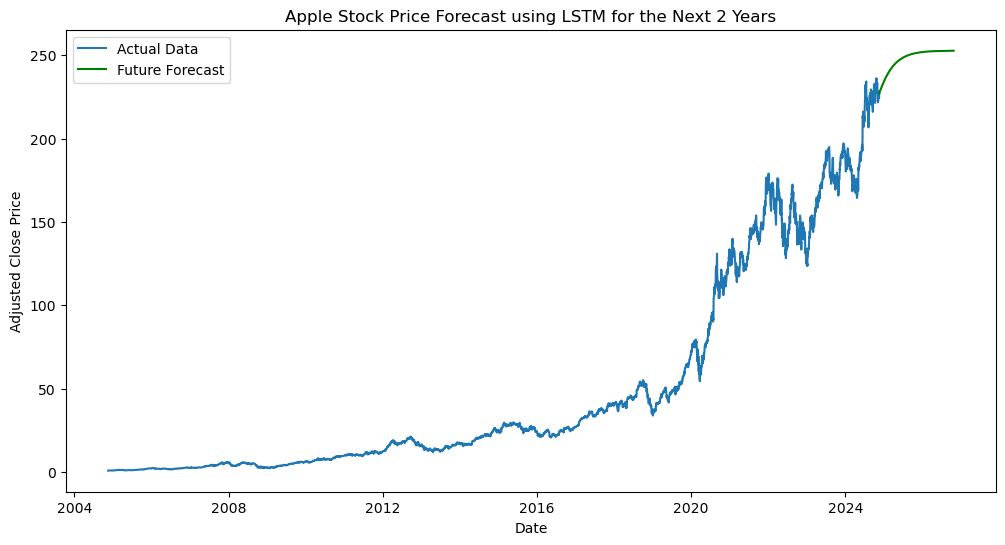

In [159]:
# Example usage with stock data (Assuming google_data, microsoft_data, apple_data are DataFrames)
lstm_forecast_future(google_data, 'Google')
lstm_forecast_future(microsoft_data, 'Microsoft')
lstm_forecast_future(apple_data, 'Apple')

Model Accuracy Comparison

In [161]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [163]:
# Evaluation Metrics Function (including MAPE)
def evaluate_model_performance(test_data, predictions, model_name, company_name):
    mse = mean_squared_error(test_data, predictions)
    mae = mean_absolute_error(test_data, predictions)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100
    print(f'{company_name} - {model_name} Performance:')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
    print('-' * 50)
    return {"MSE": mse, "MAE": mae, "RMSE": rmse, "MAPE": mape}


In [165]:
# Prepare LSTM data function
def prepare_data_lstm(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [167]:
# List of companies and their corresponding data
companies = {
    "Google": google_data, 
    "Microsoft": microsoft_data, 
    "Apple": apple_data
}

In [169]:
# Dictionary to store performance metrics for each company
performance_metrics = {}

In [173]:
# Evaluate Models for Each Company
for company, data in companies.items():
    # Split the data for ARIMA
    adj_close_prices = data['Adj Close']
    split_index = int(len(adj_close_prices) * 0.8)
    train_data = adj_close_prices[:split_index]
    test_data = adj_close_prices[split_index:]
    
    # Evaluate ARIMA Model
    arima_model = ARIMA(train_data, order=(5, 1, 0))
    arima_fit = arima_model.fit()
    arima_forecast = arima_fit.forecast(steps=len(test_data))
    arima_metrics = evaluate_model_performance(test_data, arima_forecast, "ARIMA", company)
    
    # Store performance metrics
    performance_metrics[company] = {"ARIMA": arima_metrics}
    
    # XGBoost Model Evaluation
    X, y = prepare_data_lstm(data[['Adj Close']].values, time_step=60)  # Use time_step instead of n_lag
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    xgb_model = XGBRegressor(n_estimators=1000)
    xgb_model.fit(X_train, y_train)
    xgb_predictions = xgb_model.predict(X_test)
    xgb_metrics = evaluate_model_performance(y_test, xgb_predictions, "XGBoost", company)
    
    # Add to performance metrics
    performance_metrics[company]["XGBoost"] = xgb_metrics
    
    # Evaluate LSTM Model
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))
    X, y = prepare_data_lstm(scaled_data, time_step=60)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    split = int(0.8 * len(X))
    X_train, y_train = X[:split], y[:split]
    X_test, y_test = X[split:], y[split:]
    lstm_model = Sequential()
    lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    lstm_model.add(Dropout(0.2))
    lstm_model.add(LSTM(units=50, return_sequences=False))
    lstm_model.add(Dropout(0.2))
    lstm_model.add(Dense(units=1))
    lstm_model.compile(optimizer='adam', loss='mean_squared_error')
    lstm_model.fit(X_train, y_train, epochs=20, batch_size=32)
    lstm_predictions = lstm_model.predict(X_test)
    lstm_predictions = scaler.inverse_transform(lstm_predictions)
    lstm_metrics = evaluate_model_performance(y_test, lstm_predictions, "LSTM", company)
    
    # Add to performance metrics
    performance_metrics[company]["LSTM"] = lstm_metrics

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_m

Google - ARIMA Performance:
Mean Squared Error (MSE): 2211.583664897037
Mean Absolute Error (MAE): 39.810793094816376
Root Mean Squared Error (RMSE): 47.027477764569056
Mean Absolute Percentage Error (MAPE): nan%
--------------------------------------------------
Google - XGBoost Performance:
Mean Squared Error (MSE): 2229.08280917755
Mean Absolute Error (MAE): 40.21652048388917
Root Mean Squared Error (RMSE): 47.21316351588347
Mean Absolute Percentage Error (MAPE): 28.62675290239782%
--------------------------------------------------
Epoch 1/20


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 0.0032
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 2.9061e-04
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 2.7393e-04
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 1.8874e-04
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 2.2984e-04
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 2.1089e-04
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 1.7374e-04
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 1.8789e-04
Epoch 9/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 1.5503e-04
Epoch 10/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 1.5044e-04
Epoch 11/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 1.4395e-04
Epoch 12/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 1.4549e-04
Epoch 13/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 1.5403e-04
Epoch 14/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 1.2465e-04
Ep

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_m

Microsoft - ARIMA Performance:
Mean Squared Error (MSE): 14745.916947332522
Mean Absolute Error (MAE): 99.78079959423418
Root Mean Squared Error (RMSE): 121.43276718963676
Mean Absolute Percentage Error (MAPE): nan%
--------------------------------------------------
Microsoft - XGBoost Performance:
Mean Squared Error (MSE): 15190.99888959057
Mean Absolute Error (MAE): 102.25569316921522
Root Mean Squared Error (RMSE): 123.25177033045233
Mean Absolute Percentage Error (MAPE): 29.76760446210151%
--------------------------------------------------
Epoch 1/20


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0019
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 1.9092e-04
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 1.5026e-04
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 1.5890e-04
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 1.5418e-04
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 1.6353e-04
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 1.5782e-04
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 1.1279e-04
Epoch 9/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 1.2040e-04
Epoch 10/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 1.2940e-04
Epoch 11/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 1.1572e-04
Epoch 12/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 1.2148e-04
Epoch 13/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 1.2819e-04
Epoch 14/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 1.0969e-04
Ep

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_m

Apple - ARIMA Performance:
Mean Squared Error (MSE): 3074.8235729621915
Mean Absolute Error (MAE): 47.047423880230056
Root Mean Squared Error (RMSE): 55.45109172020143
Mean Absolute Percentage Error (MAPE): nan%
--------------------------------------------------
Apple - XGBoost Performance:
Mean Squared Error (MSE): 3254.7621541972694
Mean Absolute Error (MAE): 49.05210467007891
Root Mean Squared Error (RMSE): 57.05052282141917
Mean Absolute Percentage Error (MAPE): 27.748021621654708%
--------------------------------------------------
Epoch 1/20


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0022
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 1.9767e-04
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 2.3162e-04
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 2.0732e-04
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 1.5832e-04
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 1.5783e-04
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 1.5001e-04
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 1.3350e-04
Epoch 9/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 1.5582e-04
Epoch 10/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 1.2208e-04
Epoch 11/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 1.2275e-04
Epoch 12/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 1.1857e-04
Epoch 13/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 1.6100e-04
Epoch 14/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 1.0426e-04
Ep

In [175]:
# Compare Models
# Prepare DataFrame for comparison of RMSE and MAPE
model_comparison = pd.DataFrame([{
    "Model": model, 
    "Company": company, 
    "RMSE": metrics["RMSE"], 
    "MAPE": metrics["MAPE"]
} 
for company, models in performance_metrics.items() 
for model, metrics in models.items()])

In [177]:
# Display the model comparison
print("\nModel Comparison:")
print(model_comparison)


Model Comparison:
     Model    Company        RMSE          MAPE
0    ARIMA     Google   47.027478           NaN
1  XGBoost     Google   47.213164     28.626753
2     LSTM     Google  131.048004  20262.263780
3    ARIMA  Microsoft  121.432767           NaN
4  XGBoost  Microsoft  123.251770     29.767604
5     LSTM  Microsoft  299.223474  46981.253964
6    ARIMA      Apple   55.451092           NaN
7  XGBoost      Apple   57.050523     27.748022
8     LSTM      Apple  168.955760  24748.817073


In [179]:
# Plot comparison of RMSE and MAPE
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Comparison of RMSE for Different Models')

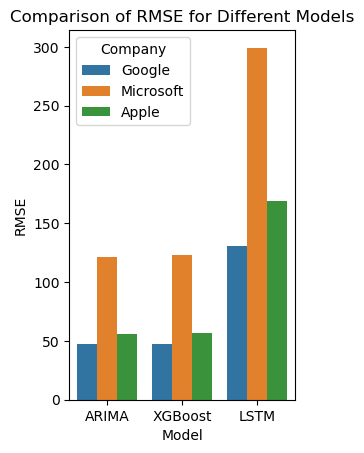

In [181]:
# Plot RMSE
plt.subplot(1, 2, 1)
sns.barplot(data=model_comparison, x="Model", y="RMSE", hue="Company")
plt.title("Comparison of RMSE for Different Models")

Text(0.5, 1.0, 'Comparison of MAPE for Different Models')

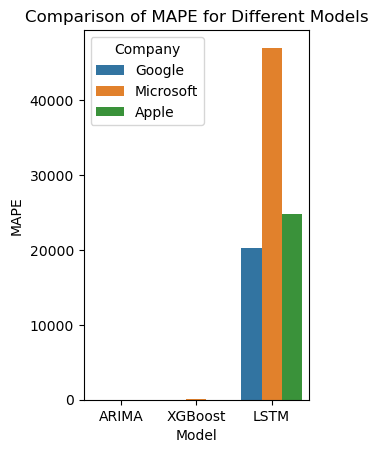

In [183]:
# Plot MAPE
plt.subplot(1, 2, 2)
sns.barplot(data=model_comparison, x="Model", y="MAPE", hue="Company")
plt.title("Comparison of MAPE for Different Models")

In [185]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>